
## Time Series GPTs

* Time series data 



## Libraries


In [1]:

## !pip install xgboost
## !pip install matplotlib
## !pip install scikit-learn
## !pip install einops
## !pip install similaritymeasures
## !pip install numba
## !pip install cudatoolkit
## !pip install mlxtend


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
import torch
## torch.set_float32_matmul_precision('medium')
import sklearn
import random
import math
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
## coefficient of determination 
from sklearn.metrics import r2_score
from einops import rearrange
from math import sqrt, log
from datetime import datetime
import similaritymeasures
from sdtw_cuda_loss import SoftDTW
from mlxtend.plotting import heatmap
import mlxtend


In [3]:

import tsGPT_tk as tsGPT
import tsDataWrangling as tsDataWrangling
import Time_Series_GPT as Time_Series_GPT
import inferenceGPT as inferenceGPT



## Instantiate


In [4]:

tsGPT_obj           = tsGPT.ParamsGPT()
tsDataWrangling_obj = tsDataWrangling.tsDataWrangling()
inferenceGPT_obj    = inferenceGPT.inferenceGPT()



## Step 1 - Data Wrangling


In [5]:

tsDataWrangling_obj.step1_wrangle()

tsDataWrangling_obj.FOUR_files_merged_data_rc


0
50000
100000
150000
200000
250000


,Timestamp_f1,MM_Timestamp_f1,THEORETICAL_TONNAGE_f3,Coke_Rate_f3,HOT_BLAST_TMP_NS_f3,WINDRATE_f3,SNORT_VALVE_POSITION_f3,COLD_BLAST_MOISTURE_f3,HOST_BLAST_MOISTURE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,NAT_GAS _INJECTION_f3,HOT_BLAST_PRESSURE_f3,TOP_PRESS_f3,TOP_TEMP_HIGHEST_f3,Top_Gas_ETACO_f3,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,SILICON_f3,SULFUR_f3,MANGANESE_f3,PHOSPHOROUS_f3,HOT_METAL_TEMP_f3,Slag_CaO_day_avg_f3,Slag_MgO_day_avg_f3,Slag_SiO2_f3,Slag_Al2O3_day_avg_f3,#14 WEST STOCKROD LEVEL,#14 EAST STOCKROD LEVEL,#14 RADAR ROD NORTH LEVEL,#14 RADAR ROD SOUTH LEVEL,Charges_per_hour_f3,BF14 material 1 weight,BF14 extra coke weight,BF14 material 2 weight,BF14 material 2 weight.1,BF14 material 3 weight,BF14 material 3 weight.1,BF14 material 4 weight,BF14 material 4 weight.1,BF14 material 5 weight,BF14 material 5 weight.1,BF14 material 6 weight,BF14 material 6 weight.1,BF14 material 7 weight,BF14 material 7 weight.1,BF14 material 8 weight,BF14 material 8 weight.1,BF14 material 9 weight,BF14 material 9 weight.1,BF14 material 10 weight,BF14 material 10 weight.1,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,pd_index,date_f1,CNUM,LNUM_f1,SI_f1,S_f1,MN_f1,P_f1,CU_f1,NI_f1,CR_f1,MO_f1,TI_f1,HM_Temp_f1,ProbeSi_f1,Time_f1,Compliant_eq_1_f1,C_perce_sat_f1,Before_After_f1,Good_bad_f1,date,Slag_Time_f2,Open_Time_f2,Close_Time_f2,Taphole_f2,Pipe_burn_hole_f2,Taphole_Length_f2,Clay_box_f2,Clay_Close_hole_ft3_f2,Clay_temp_f2,Drill_bit_size_f2,Drill_shafts_used_f2,Cast_Avg_Temp_f2,Cast_Avg_Si_f2,Cast_Avg_S_f2,Cast_Avg_Mn_f2,Cast_Avg_P_f2,Cast_Avg_Cu_f2,Cast_Avg_Ni_f2,Cast_Avg_Cr_f2,Cast_Avg_Mo_f2,Cast_Avg_Ti_f2,Slag_Fe_f2,Slag_SiO2_f2,Slag_Al2O3_f2,Slag_CaO_f2,Slag_MgO_f2,Slag_S_f2,Slag_K2O_f2,Slag_B_SiO2_f2,Slag_TiO2_f2,cokerate_f4
0,2021-08-01 01:23:00,2021-08-01 00:00:00,6006,992,1999.604384,179.749638,98.334297,4.997585,8.084517,2.510680,0.0,4034.234339,34.357590,17.398326,245.335109,0.458303,22.322068,18.729296,3.559210,54.250139,0.776,0.052,0.510,0.068,2736.960938,37.830002,10.577999,38.029511,7.084000,8.720904,-0.001068,8.455500,8.706066,4.172247,226085.1667,309.166667,653422.0,15730100,103426.0000,2756060,0,0,0,0,0.000000,0,31782.33333,848140,0,0,21118.33333,562140,9022.666667,212980,158.478922,245.634175,145.396538,220.717349,0,44409,2809,182,1.152,0.042,0.577,0.077,0.003,0.020,0.052,0.002,0.036,2677,NaN,0.057639,NaN,4.692156,B,0.0,8/1/2021 0:00,00:59,00:55,03:23,2,0,11.4,602,2.75,165,2.12,1,2714,1.048,0.046,0.546,0.075,0.003,0.018,0.051,0.002,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41,992
1,2021-08-01 01:23:00,2021-08-01 00:01:00,6006,992,2000.288837,179.765945,98.334297,5.000531,8.079545,2.489381,0.0,4024.947376,34.328821,17.483486,251.198262,0.458277,22.335329,18.731320,3.559234,54.194257,0.776,0.052,0.510,0.068,2736.960938,37.830002,10.577999,38.029511,7.084000,3.973097,-0.001068,8.617396,8.988543,4.166692,226655.5000,927.500000,651306.0,15730100,103438.0000,2756060,0,0,0,0,0.000000,0,31787.00000,848140,0,0,21115.00000,562140,8988.000000,212980,159.637733,252.459217,145.570895,226.360600,0,44409,2809,182,1.152,0.042,0.577,0.077,0.003,0.020,0.052,0.002,0.036,2677,NaN,0.057639,NaN,4.692156,B,0.0,8/1/2021 0:00,00:59,00:55,03:23,2,0,11.4,602,2.75,165,2.12,1,2714,1.048,0.046,0.546,0.075,0.003,0.018,0.051,0.002,0.032,0.05,38.709999,7.37,37.610001,10.59,1.06,0.38,1.25,0.41,992
2,2021-08-01 01:23:00,2021-08-01 00:02:00,6006,992,1999.242862,179.782251,98.334297,5.003476,8.074573,2.489037,0.0,4011.601682,34.300052,17.260358,242.609669,0.458250,22.348590,18.733343,3.559259,54.138374,0.776,0.052,0.510,0.068,2736.960938,37.830002,10.577999,38.029511,7.084000,0.158669,-0.001068,8.654926,9.076585,4.166692,227225.8333,1545.833333,649190.0,15730100,103450.0000,2756060,0,0,0,0,0.000000,0,31791.66667,848140,0,0,21111.66667,562140,8953.333333,212980,160.796544,252.645736,145.745252,230.297540,0,44409,2809,182,1.152,0.042,0.577,0.077,0.003,0.020,0.052,0.002,0.036,2677,NaN,0.057639,


## Step 2 - Data Wrangling


In [6]:

tsDataWrangling_obj.step2_wrangle()


In [7]:

tsDataWrangling_obj.df_res_shifted 


,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,date_f1,CNUM,LNUM_f1,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
1,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,44562.0,2.0,168.666667,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
2,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,44562.0,6.0,137.450000,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
3,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,44562.0,7.0,156.684211,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
4,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,44562.0,8.0,150.869919,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
5,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,44562.0,9.0,160.218182,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,44561.0,4344.0,147.500000,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,3.0,2730.002686,884.0
1391,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,44561.0,4345.0,147.500000,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,1.0,2730.002686,884.0
1392,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,44561.0,4346.0,174.000000,21.048415,18.309327,4.129862,55.140373,166.903493,181.684648,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,3.0,2730.002686,884.0
1393,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,44561.0,4347.0,160.000000,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,1.0,2730.002686,884.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 1 to 1394
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SI_f1                    1394 non-null   float64
 1   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 2   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 3   NAT_GAS _INJECTION_f3    1394 non-null   float64
 4   WINDRATE_f3              1394 non-null   float64
 5   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 6   COAL_FLOW_f3             1394 non-null   float64
 7   Cast_Avg_Mn_f2           1394 non-null   float64
 8   Slag_Fe_f2               1394 non-null   float64
 9   date_f1                  1394 non-null   float64
 10  CNUM                     1394 non-null   float64
 11  LNUM_f1                  1394 non-null   float64
 12  Selec_Top_Gas_CO_f3      1394 non-null   float64
 13  Selec_Top_Gas_CO2_f3     1394 non-null   float64
 14  Selec_Top_Gas_H2_f3     

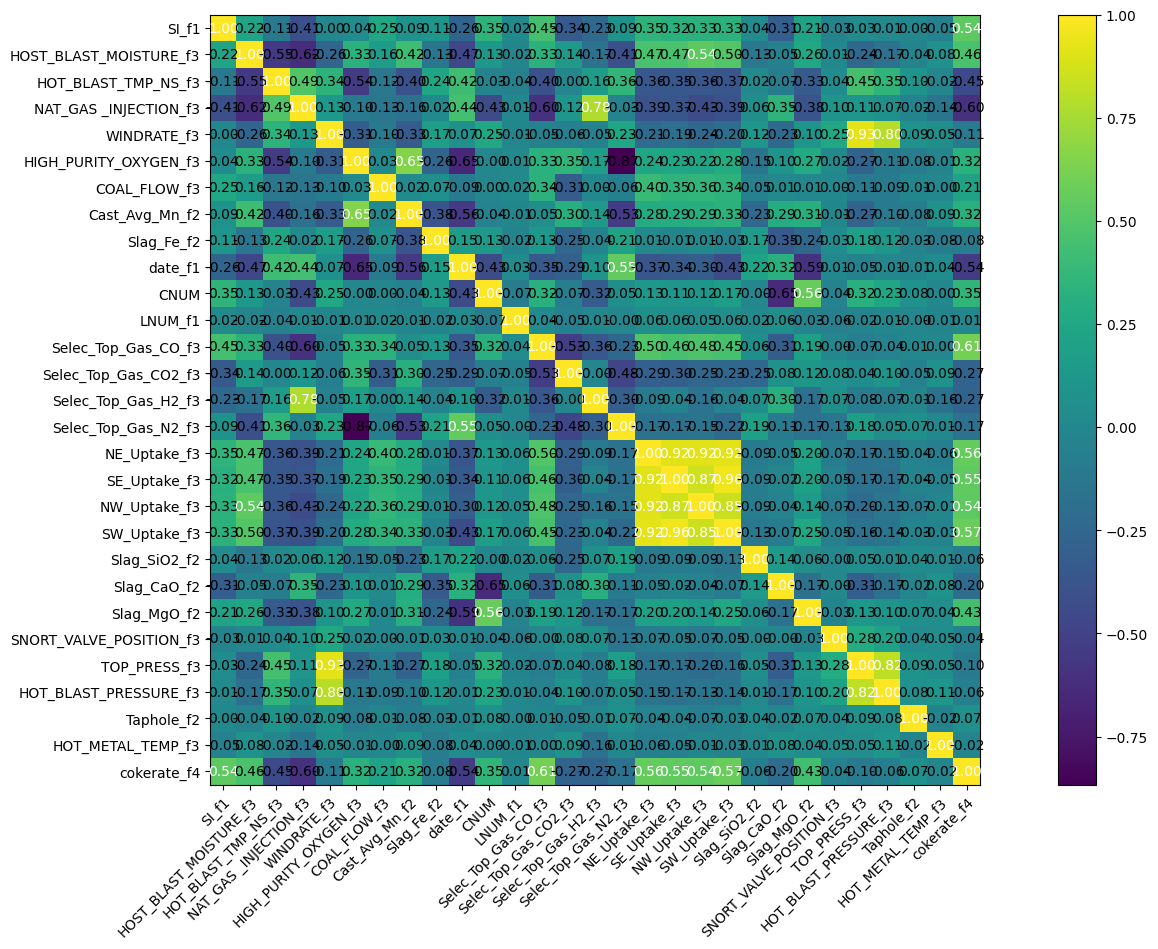

In [8]:

tsDataWrangling_obj.step2_simpler_plot_correlation_matrix(  tsDataWrangling_obj.df_res_shifted    )


In [9]:

tsDataWrangling_obj.dates_df_res_shifted


,SI_f1,Date_Map,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,date_f1,CNUM,LNUM_f1,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
1,0.719500,2022-01-01 00:45:00,4.242439,2161.425209,9306.840913,184.818611,0.0,0.0,0.354,0.16,44562.0,2.0,168.666667,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
2,0.710486,2022-01-01 08:43:00,4.174343,2168.238915,9336.364456,185.993447,0.0,0.0,0.313,0.83,44562.0,6.0,137.450000,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
3,0.666106,2022-01-01 10:17:00,4.126144,2167.779119,9419.200115,185.828474,0.0,0.0,0.360,0.10,44562.0,7.0,156.684211,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
4,0.675145,2022-01-01 12:40:00,4.120736,2166.974740,9564.165802,185.924481,0.0,0.0,0.319,0.34,44562.0,8.0,150.869919,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
5,0.776831,2022-01-01 15:06:00,4.120331,2166.384674,9648.247637,185.942943,0.0,0.0,0.335,0.28,44562.0,9.0,160.218182,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1390,0.762500,2021-12-31 13:10:00,4.204430,2169.361647,9297.484543,185.046491,0.0,0.0,0.343,0.30,44561.0,4344.0,147.500000,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,3.0,2730.002686,884.0
1391,0.646000,2021-12-31 14:41:00,4.208539,2169.079601,9312.779010,185.053796,0.0,0.0,0.324,0.30,44561.0,4345.0,147.500000,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,1.0,2730.002686,884.0
1392,0.654667,2021-12-31 16:15:00,4.212648,2168.797556,9303.753420,185.007919,0.0,0.0,0.325,0.16,44561.0,4346.0,174.000000,21.048415,18.309327,4.129862,55.140373,166.903493,181.684648,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,3.0,2730.002686,884.0
1393,0.591667,2021-12-31 17:40:00,4.217784,2168.444999,9333.448101,184.942435,0.0,0.0,0.335,0.26,44561.0,4347.0,160.000000,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,1.0,2730.002686,884.0



## Step 3 - Data Wrangling


In [10]:

tsDataWrangling_obj.step3_wrangle()


In [11]:

tsDataWrangling_obj.for_RNN_data_CIVS 


,delta_SI,mov_avg_SI,SI_f1,Date_Map,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,sec,min,hour,day,month,year,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,CNUM,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
0,0.000000,0.000000,0.719500,2022-01-01 00:45:00,4.242439,2161.425209,9306.840913,184.818611,0.0,0,45,0,1,1,2022,0.0,0.354,0.16,2.0,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
1,0.000000,0.000000,0.710486,2022-01-01 08:43:00,4.174343,2168.238915,9336.364456,185.993447,0.0,0,43,8,1,1,2022,0.0,0.313,0.83,6.0,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
2,-0.044380,0.000000,0.666106,2022-01-01 10:17:00,4.126144,2167.779119,9419.200115,185.828474,0.0,0,17,10,1,1,2022,0.0,0.360,0.10,7.0,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
3,0.009040,0.000000,0.675145,2022-01-01 12:40:00,4.120736,2166.974740,9564.165802,185.924481,0.0,0,40,12,1,1,2022,0.0,0.319,0.34,8.0,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
4,0.101686,0.000000,0.776831,2022-01-01 15:06:00,4.120331,2166.384674,9648.247637,185.942943,0.0,0,6,15,1,1,2022,0.0,0.335,0.28,9.0,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,0.109500,0.004444,0.762500,2021-12-31 13:10:00,4.204430,2169.361647,9297.484543,185.046491,0.0,0,10,13,31,12,2021,0.0,0.343,0.30,4344.0,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,3.0,2730.002686,884.0
1390,-0.116500,0.008900,0.646000,2021-12-31 14:41:00,4.208539,2169.079601,9312.779010,185.053796,0.0,0,41,14,31,12,2021,0.0,0.324,0.30,4345.0,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,1.0,2730.002686,884.0
1391,0.008667,-0.037618,0.654667,2021-12-31 16:15:00,4.212648,2168.797556,9303.753420,185.007919,0.0,0,15,16,31,12,2021,0.0,0.325,0.16,4346.0,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,3.0,2730.002686,884.0
1392,-0.063000,-0.014340,0.591667,2021-12-31 17:40:00,4.217784,2168.444999,9333.448101,184.942435,0.0,0,40,17,31,12,2021,0.0,0.335,0.26,4347.0,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,1.0,2730.002686,884.0


In [12]:

tsDataWrangling_obj.delta_for_RNN_data_CIVS 


,delta_SI,mov_avg_SI,SI_f1,Date_Map,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,sec,min,hour,day,month,year,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,CNUM,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
0,0.000000,0.000000,0.719500,2022-01-01 00:45:00,4.242439,2161.425209,9306.840913,184.818611,0.0,0,45,0,1,1,2022,0.0,0.354,0.16,2.0,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
1,0.000000,0.000000,0.710486,2022-01-01 08:43:00,4.174343,2168.238915,9336.364456,185.993447,0.0,0,43,8,1,1,2022,0.0,0.313,0.83,6.0,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
2,-0.044380,0.000000,0.666106,2022-01-01 10:17:00,4.126144,2167.779119,9419.200115,185.828474,0.0,0,17,10,1,1,2022,0.0,0.360,0.10,7.0,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
3,0.009040,0.000000,0.675145,2022-01-01 12:40:00,4.120736,2166.974740,9564.165802,185.924481,0.0,0,40,12,1,1,2022,0.0,0.319,0.34,8.0,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
4,0.101686,0.000000,0.776831,2022-01-01 15:06:00,4.120331,2166.384674,9648.247637,185.942943,0.0,0,6,15,1,1,2022,0.0,0.335,0.28,9.0,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,0.109500,0.004444,0.762500,2021-12-31 13:10:00,4.204430,2169.361647,9297.484543,185.046491,0.0,0,10,13,31,12,2021,0.0,0.343,0.30,4344.0,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,3.0,2730.002686,884.0
1390,-0.116500,0.008900,0.646000,2021-12-31 14:41:00,4.208539,2169.079601,9312.779010,185.053796,0.0,0,41,14,31,12,2021,0.0,0.324,0.30,4345.0,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,1.0,2730.002686,884.0
1391,0.008667,-0.037618,0.654667,2021-12-31 16:15:00,4.212648,2168.797556,9303.753420,185.007919,0.0,0,15,16,31,12,2021,0.0,0.325,0.16,4346.0,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,3.0,2730.002686,884.0
1392,-0.063000,-0.014340,0.591667,2021-12-31 17:40:00,4.217784,2168.444999,9333.448101,184.942435,0.0,0,40,17,31,12,2021,0.0,0.335,0.26,4347.0,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,1.0,2730.002686,884.0


In [13]:

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS.drop(  ['Date_Map'], axis=1 ) 


In [14]:

tsDataWrangling_obj.for_RNN_data_CIVS


,delta_SI,mov_avg_SI,SI_f1,HOST_BLAST_MOISTURE_f3,HOT_BLAST_TMP_NS_f3,NAT_GAS _INJECTION_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,sec,min,hour,day,month,year,COAL_FLOW_f3,Cast_Avg_Mn_f2,Slag_Fe_f2,CNUM,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Slag_SiO2_f2,Slag_CaO_f2,Slag_MgO_f2,SNORT_VALVE_POSITION_f3,TOP_PRESS_f3,HOT_BLAST_PRESSURE_f3,Taphole_f2,HOT_METAL_TEMP_f3,cokerate_f4
0,0.000000,0.000000,0.719500,4.242439,2161.425209,9306.840913,184.818611,0.0,0,45,0,1,1,2022,0.0,0.354,0.16,2.0,21.080431,18.313322,4.131228,54.940123,171.769513,182.533770,148.126483,192.512412,37.369999,36.439999,9.86,98.334297,18.532928,36.602600,1.0,2730.002686,884.0
1,0.000000,0.000000,0.710486,4.174343,2168.238915,9336.364456,185.993447,0.0,0,43,8,1,1,2022,0.0,0.313,0.83,6.0,20.996415,18.311768,4.133911,55.072779,170.595469,183.725050,148.161842,192.366046,35.540001,35.970001,9.03,98.334297,18.397217,36.882963,1.0,2730.002686,884.0
2,-0.044380,0.000000,0.666106,4.126144,2167.779119,9419.200115,185.828474,0.0,0,17,10,1,1,2022,0.0,0.360,0.10,7.0,20.749627,18.341701,4.137632,55.375043,167.017421,195.812061,147.562523,198.423474,34.849998,36.590000,9.13,98.334297,18.393974,36.568884,3.0,2729.690821,884.0
3,0.009040,0.000000,0.675145,4.120736,2166.974740,9564.165802,185.924481,0.0,0,40,12,1,1,2022,0.0,0.319,0.34,8.0,20.609259,18.644476,4.142824,55.341884,154.214917,188.028883,147.807509,179.116839,34.009998,35.900002,8.82,98.334297,18.370316,36.839147,1.0,2703.051419,884.0
4,0.101686,0.000000,0.776831,4.120331,2166.384674,9648.247637,185.942943,0.0,0,6,15,1,1,2022,0.0,0.335,0.28,9.0,20.617383,18.845791,4.220690,55.284451,156.234542,200.141261,149.014319,186.052137,34.380001,35.970001,8.73,98.334297,18.395860,36.658018,3.0,2741.996582,884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,0.109500,0.004444,0.762500,4.204430,2169.361647,9297.484543,185.046491,0.0,0,10,13,31,12,2021,0.0,0.343,0.30,4344.0,21.039583,18.308225,4.129485,55.162782,167.619915,185.900341,148.103530,199.914193,35.900002,37.259998,10.04,98.334297,18.209401,36.727897,3.0,2730.002686,884.0
1390,-0.116500,0.008900,0.646000,4.208539,2169.079601,9312.779010,185.053796,0.0,0,41,14,31,12,2021,0.0,0.324,0.30,4345.0,21.043999,18.308776,4.129674,55.162767,164.706552,182.408576,148.106012,193.501805,35.900002,37.259998,10.04,98.334297,18.762846,36.949964,1.0,2730.002686,884.0
1391,0.008667,-0.037618,0.654667,4.212648,2168.797556,9303.753420,185.007919,0.0,0,15,16,31,12,2021,0.0,0.325,0.16,4346.0,21.048415,18.309327,4.129862,55.140373,166.903493,181.684649,148.108493,194.328694,35.580002,36.500000,9.30,98.334297,18.510120,36.877184,3.0,2730.002686,884.0
1392,-0.063000,-0.014340,0.591667,4.217784,2168.444999,9333.448101,184.942435,0.0,0,40,17,31,12,2021,0.0,0.335,0.26,4347.0,21.053935,18.310016,4.130097,55.098014,175.524144,195.202191,148.111595,215.606202,35.130001,37.470001,10.01,98.334297,18.168884,36.681149,1.0,2730.002686,884.0



## Correlation Matrix


In [15]:

def simple_plot_correlation_matrix( res ):
        print(  res.info()  )
        print(  res.shape   )
        headers_list = ['delta_SI', 'mov_avg_SI', 'SI_f1', 'HOST_BLAST_MOISTURE_f3', 'HOT_BLAST_TMP_NS_f3', 
                        'NAT_GAS _INJECTION_f3', 'WINDRATE_f3', 'HIGH_PURITY_OXYGEN_f3',  
                        'month', 'COAL_FLOW_f3', 'Cast_Avg_Mn_f2', 'Slag_Fe_f2', 
                        'CNUM', 'Selec_Top_Gas_CO_f3', 'Selec_Top_Gas_CO2_f3', 'Selec_Top_Gas_H2_f3', 
                        'Selec_Top_Gas_N2_f3', 'NE_Uptake_f3', 'SE_Uptake_f3', 'NW_Uptake_f3', 'SW_Uptake_f3', 
                        'Slag_SiO2_f2', 'Slag_CaO_f2', 'Slag_MgO_f2', 'SNORT_VALVE_POSITION_f3', 'TOP_PRESS_f3', 
                        'HOT_BLAST_PRESSURE_f3', 'Taphole_f2', 'HOT_METAL_TEMP_f3', 'cokerate_f4']
        ## headers_list = res.columns.values.tolist()
        print(  headers_list  )
        cm = np.corrcoef(  res[ headers_list ].values.T  )
        hm = heatmap(cm, row_names= headers_list, column_names=headers_list, figsize=[20,10])
        plt.show()


In [16]:

'''

tsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  
                     tsDataWrangling_obj.for_RNN_data_CIVS    
)


'''


'\n\ntsDataWrangling_obj.for_RNN_data_CIVS = tsDataWrangling_obj.simulate_better_dataset_more(  \n                     tsDataWrangling_obj.for_RNN_data_CIVS    \n)\n\n\n'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1394 entries, 0 to 1393
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delta_SI                 1394 non-null   float64
 1   mov_avg_SI               1394 non-null   float64
 2   SI_f1                    1394 non-null   float64
 3   HOST_BLAST_MOISTURE_f3   1394 non-null   float64
 4   HOT_BLAST_TMP_NS_f3      1394 non-null   float64
 5   NAT_GAS _INJECTION_f3    1394 non-null   float64
 6   WINDRATE_f3              1394 non-null   float64
 7   HIGH_PURITY_OXYGEN_f3    1394 non-null   float64
 8   sec                      1394 non-null   int64  
 9   min                      1394 non-null   int64  
 10  hour                     1394 non-null   int64  
 11  day                      1394 non-null   int64  
 12  month                    1394 non-null   int64  
 13  year                     1394 non-null   int64  
 14  COAL_FLOW_f3            

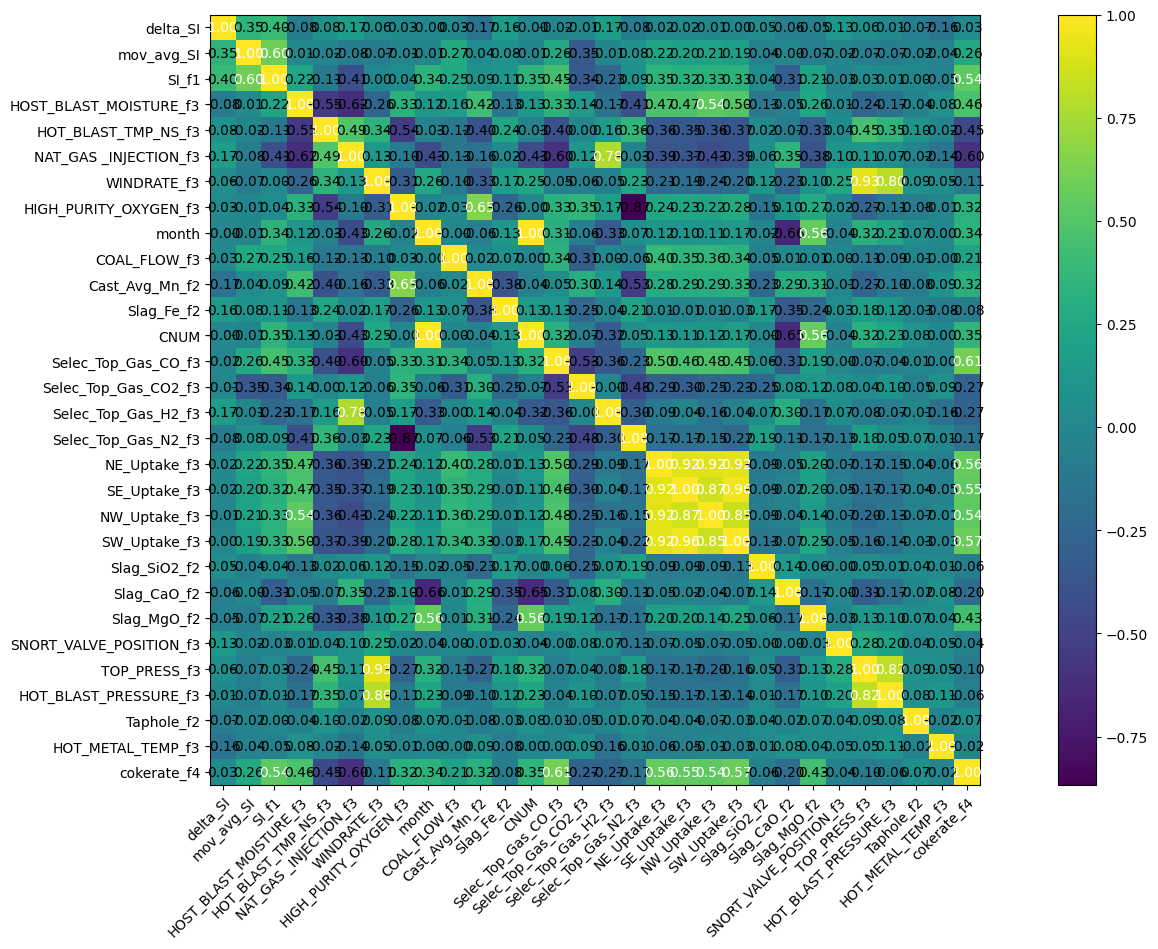

In [17]:


simple_plot_correlation_matrix( tsDataWrangling_obj.for_RNN_data_CIVS   )




## Pass Wrangled data to GPT experimenter


In [18]:

tsGPT_obj.for_RNN_data_CIVS = tsDataWrangling_obj.for_RNN_data_CIVS 

tsGPT_obj.length_n          = int(   tsGPT_obj.for_RNN_data_CIVS.shape[0]    )
print(     tsGPT_obj.length_n     )


1394



## Training Functions


In [19]:

def custom_loss_ratio(pred, real, mse_weight=0.8, log_ratio_weight=0.2):
    eps = 1e-6
    safe_ratio = torch.clamp(torch.abs((pred + eps) / (real + eps)), min=0.1, max=10.0)
    log_ratio = torch.log(safe_ratio + eps)
    ratio_loss = torch.mean(log_ratio ** 2)
    mse_loss = F.mse_loss(pred, real)
    return mse_weight * mse_loss + log_ratio_weight * ratio_loss



In [20]:

import torch

def log_cosh_loss(pred, target):
    """
    Computes the log-cosh loss between predictions and targets.
    This is smoother than MSE and less sensitive to outliers.

    Args:
        pred (Tensor): Predicted values (e.g., pred_si)
        target (Tensor): Ground truth values (e.g., y_si)

    Returns:
        Tensor: Scalar loss
    """
    return torch.mean(torch.log(torch.cosh(pred - target + 1e-6)))



In [21]:

def custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25, clip_low=0.5, clip_high=2.0):
    """
    Parameters:
    - loss_SI: torch.Tensor (scalar) — Loss on the silicon prediction
    - loss_all: torch.Tensor (scalar) — Loss on the full feature vector
    - beta: float — weight for ratio regularization
    - desired_ratio: float — the target ratio of SI loss to total loss
    - clip_low, clip_high: float — clipping bounds for the loss ratio (like PPO)

    Returns:
    - loss_total: torch.Tensor (scalar)
    """

    # Compute the raw ratio
    raw_ratio = loss_SI / (loss_all.detach() + 1e-8)

    # Clip the ratio like PPO to prevent extreme swings
    clipped_ratio = torch.clamp(raw_ratio, clip_low, clip_high)

    # Use clipped ratio to weight the loss dynamically
    weighted_SI = clipped_ratio * loss_SI
    weighted_all = (1 - clipped_ratio) * loss_all

    # Main loss component (adaptive weighting)
    loss_main = weighted_SI + weighted_all

    # Regularization to encourage a specific SI/total ratio (stabilizes dynamics)
    loss_total_for_ratio = loss_SI + loss_all + 1e-8
    actual_ratio = loss_SI / loss_total_for_ratio
    ratio_reg = (actual_ratio - desired_ratio).pow(2)

    # Combine total loss
    loss_total = loss_main + beta * ratio_reg

    return loss_total



In [22]:


def function_train_rc(train_CIVS_2, reasoning_steps=1, backprop_through_steps=False):
    
    
    # === Model Setup ===
    model = Time_Series_GPT.Time_Series_GPT(tsGPT_obj).to(tsGPT_obj.device)
    optimizer = torch.optim.Adam(model.parameters(), lr=tsGPT_obj.learning_rate, weight_decay=1e-4)

    criterion = nn.MSELoss()


    # === History ===
    history = {
        'loss': [], 'test_loss': [],
        'loss_A': [], 'loss_B': [], 'loss_C': [],
        'loss_SIM0': [], 'loss_SIM1': [], 'loss_SIM2': [],
        'loss_SIM3': [], 'loss_SIM4': [], 'loss_SIM5': []
    }

    # === Data Scaling ===
    train_CIVS_tr, x_means, x_standard_devs = tsGPT_obj.standardize_x_scales(train_CIVS_2)
    train_CIVS_tr_scaled = (train_CIVS_tr - x_means) / x_standard_devs

    model.train()
    

    for batch_i, epoch in enumerate(range(tsGPT_obj.max_iters)):
        xb, yb = tsGPT_obj.get_batch(train_CIVS_tr_scaled)  # shapes: [B, T, F]
        
        ## B, T, E  = logits.shape
        
        if model.training:
            noise = 0.01 * torch.randn_like(xb)
            xb    = xb + noise.clamp(-0.05, 0.05)

        
        # === Forward Pass with Reasoning Mode ===
        idx_pred, pred_si = model(
            xb, 
            targets=None, 
            reasoning_steps=reasoning_steps,
            backprop_through_steps=backprop_through_steps,
            return_si=True  
        )  # pred: [B, F] (only the last timestep)
        
        pred = idx_pred[:, -1:, :]
        
        #####################################################################################
        
 
        # === Match dimensions for loss ===
        B, T, E = xb.shape
        y_train = yb[:, -1, :]  # last timestep only
        
        ###################################################################################
        
        pred = pred.view(B, E)
        
        y_si = y_train[:, 2]     # [B]
        
        ###################################################################################
        
        loss_just_last   = criterion( pred, y_train)   ## just 9th of 9
        
        ## print(idx_pred.shape)
        ## print(yb.shape)
        ## print(xb.shape)
        ## print(idx_pred[:,-10:, :].shape)
        loss_full_seq    = criterion( idx_pred[:,-tsGPT_obj.block_size :, :] , yb)    ## all 9 of 9
        
        all_sequence = True
        
        if all_sequence:
            loss_all = loss_full_seq
        else:
            loss_all = loss_just_last
        
    
        ###################################################################################
        ## Trying weighted loss al, to focus on first 4, if not work, remove this whole block
        
        # Weighted time-step loss (more focus on early steps)
        weights = torch.tensor([5, 4, 4, 2, 1, 1, 1, 1, 1, 1], device=pred.device, dtype=pred.dtype)
        weights = weights / weights.sum()  # Normalize

        pred_seq = idx_pred[:, -tsGPT_obj.block_size:, :]  # [B, 10, F]
        target_seq = yb                                     # [B, 10, F]

        loss_all = ((pred_seq - target_seq) ** 2 * weights.view(1, -1, 1)).mean()
        
        ###################################################################################
        
        
        ## loss_SI  = criterion(pred_si, y_si)    
        loss_mse  = F.mse_loss(    pred_si, y_si)
        loss_cosh = log_cosh_loss( pred_si, y_si)
        loss_SI_main = 0.5 * loss_mse + 0.5 * loss_cosh
        
        
        ## loss_SI_main = criterion(pred_si, y_si)
        y_si_early   = yb[:, :1, 2]                  # first 4 steps of SI ground truth
        si_mean_early = y_si_early.mean(dim=1)       # average over early steps
        early_penalty = F.mse_loss(pred_si, si_mean_early)
        beta    = 0  # how much to weigh the early trend alignment (can try 0.2–0.4)
        ## beta       = 0.3 * (1 - batch_i / tsGPT_obj.max_iters)

        loss_SI = (1 - beta) * loss_SI_main + beta * early_penalty
        
        
        ##################################
        
        alpha = 0.9
        
        loss_total = alpha * loss_SI + (1 - alpha) * loss_all
        
        
        
        ####################################################################################
        ## loss_total = loss_SI 
        ## loss_total = custom_loss(loss_SI, loss_all, beta=1.0, desired_ratio=0.25)
        ##loss_total = custom_loss_ratio(pred, y_train, mse_weight=0.5, clip_eps=0.2)
        ### ratio 
        ## loss_vector = custom_loss_ratio(pred, y_train, mse_weight=0.5, log_ratio_weight=0.5)
        ## loss_total = alpha * loss_SI + (1 - alpha) * loss_vector
        ####################################################################################

        # === Backprop ===
        optimizer.zero_grad(set_to_none=True)
        loss_total.backward()
        optimizer.step()
         

        # === Logging ===
        history['loss'].append(loss_total.item())
        history['loss_A'].append(loss_SI.item())
        history['loss_B'].append(loss_all.item())
        history['loss_C'].append(0)

        # Placeholders if Curve_SIMs aren't defined
        history['loss_SIM0'].append(0)
        history['loss_SIM1'].append(0)
        

        # === Debug Print ===
        if batch_i % 500 == 0:
            print(f"[{batch_i}] Train Loss: {loss_total.item():.6f}")
            print("Loss_SI:", loss_SI.item(), "Loss_all:", loss_all.item())
            print("Prediction shape:", pred.shape)
            print("===")

    tsGPT_obj.plot_losses_training(history)
    return model, history, x_means, x_standard_devs, train_CIVS_tr_scaled






## Train on Train, Test on Test



## Run 1


In [23]:

all_real_si_300to400 = []
all_pred_si_300to400 = []

all_real_si_200to400 = []
all_pred_si_200to400 = []

all_real_si_100to400 = []
all_pred_si_100to400 = []

all_real_si_000to400 = []
all_pred_si_000to400 = []


In [24]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.922605
Loss_SI: 1.013842225074768 Loss_all: 0.10146680474281311
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.038487
Loss_SI: 0.03021896630525589 Loss_all: 0.11290178447961807
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.022794
Loss_SI: 0.01395594421774149 Loss_all: 0.10233762115240097
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.028740
Loss_SI: 0.022258372977375984 Loss_all: 0.08707180619239807
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.017351
Loss_SI: 0.009785903617739677 Loss_all: 0.08543205261230469
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.015842
Loss_SI: 0.007584219332784414 Loss_all: 0.09016627073287964
Prediction shape: torch.Size([32, 35])
===


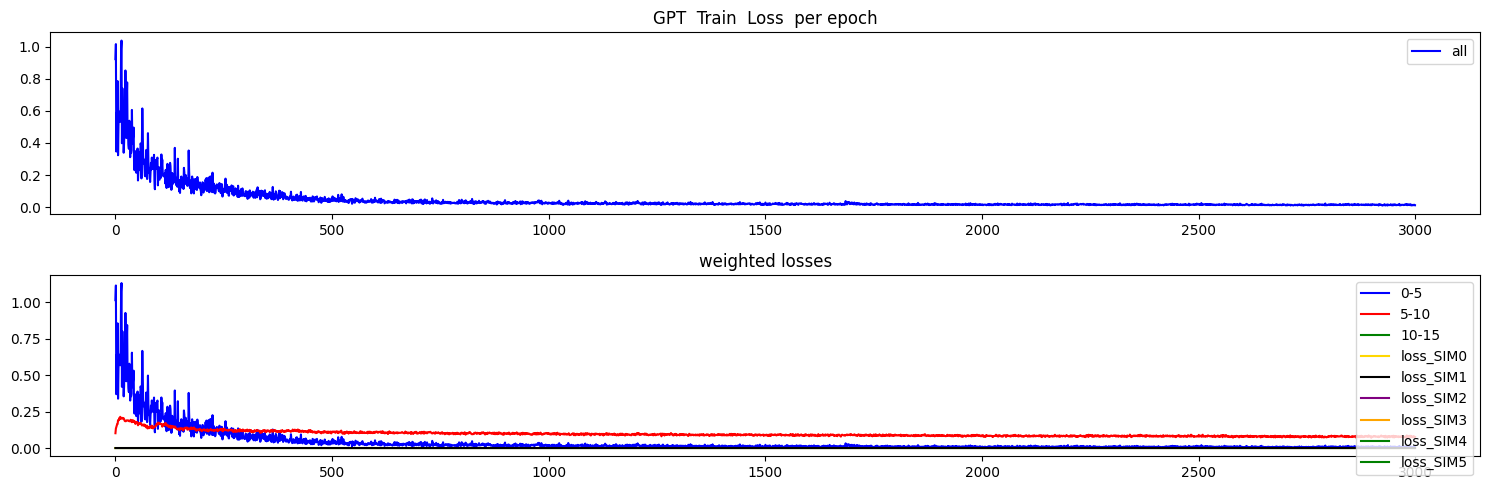

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


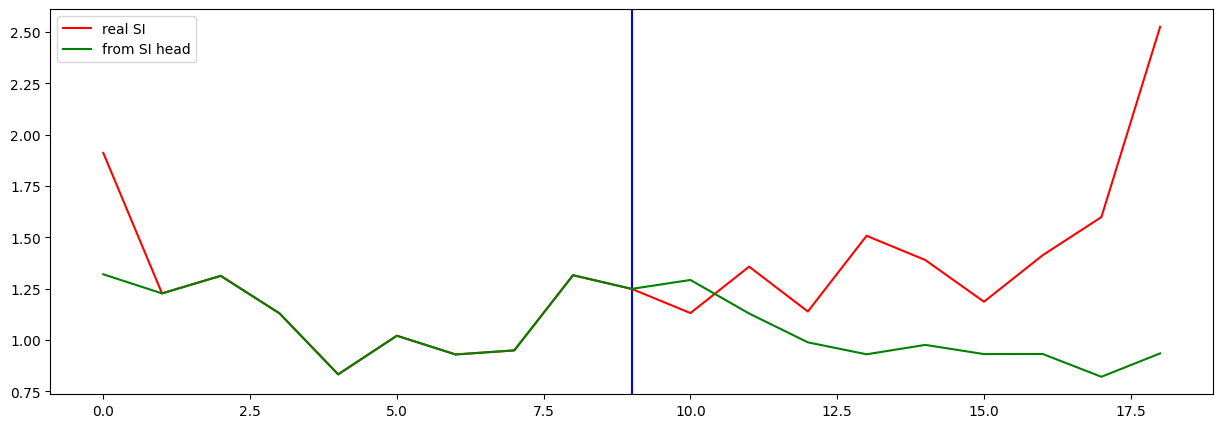

Testing R**2 - (all) - (no inputs):  0.7388203595502955
Testing R**2 - (f2) - SI full (no inputs):  -2.9806498341814547
Testing R**2 - SI head only (no inputs):  -2.4483977976286626
0 ...index R**2 (no inputs):  -0.12991864844886925
1 ...index R**2 (no inputs):  -2.010458382760854
2 ...index R**2 (no inputs):  -2.9806498341814547
3 ...index R**2 (no inputs):  0.12660683600676714
4 ...index R**2 (no inputs):  -0.28651688013699395
5 ...index R**2 (no inputs):  -0.726856856475026
6 ...index R**2 (no inputs):  -0.20026300064091895
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.11306208941832807
10 ...index R**2 (no inputs):  -0.12513900257944965
11 ...index R**2 (no inputs):  -187.42557424941023
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.30534627011227156
16 ...index R**2 (no inputs):  -0.4261966742294332
17 ...index R**2 (no inputs):  -702.92

In [25]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk300to400_train,    
                          reasoning_steps=10,
                          backprop_through_steps=True
) 


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.628316
Loss_SI: 0.6884102821350098 Loss_all: 0.08747077733278275
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.139467
Loss_SI: 0.1425081193447113 Loss_all: 0.11209447681903839
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.075295
Loss_SI: 0.07134421169757843 Loss_all: 0.11085379123687744
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.040308
Loss_SI: 0.0352313406765461 Loss_all: 0.08599924296140671
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.027760
Loss_SI: 0.01726965419948101 Loss_all: 0.12217333167791367
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.023899
Loss_SI: 0.01639399863779545 Loss_all: 0.09144409000873566
Prediction shape: torch.Size([32, 35])
===


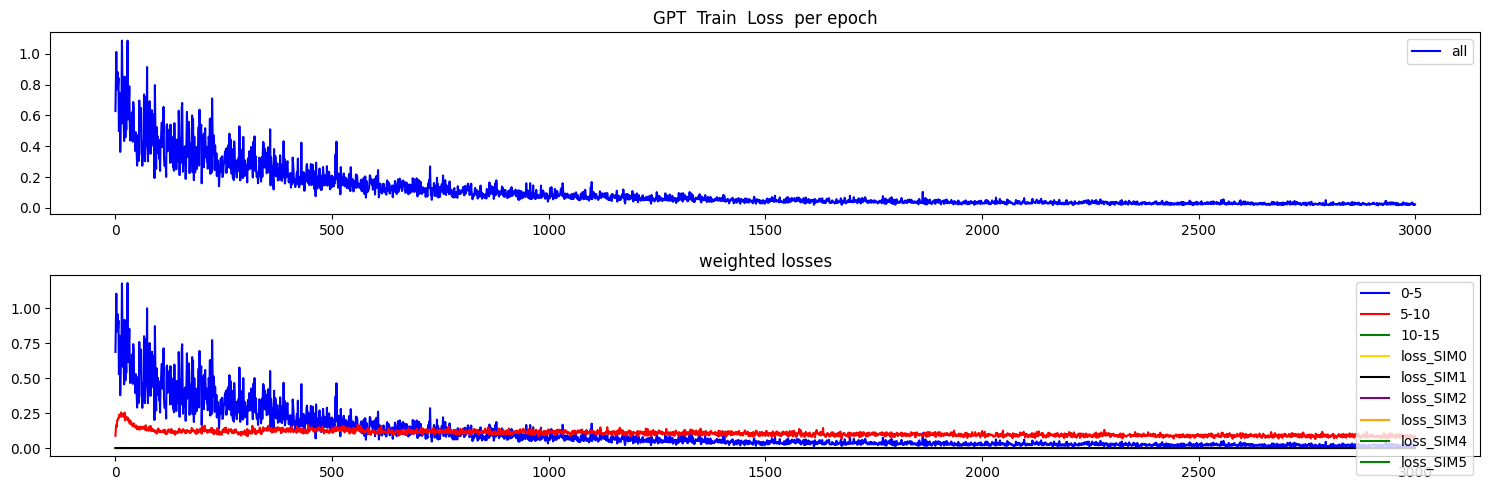

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


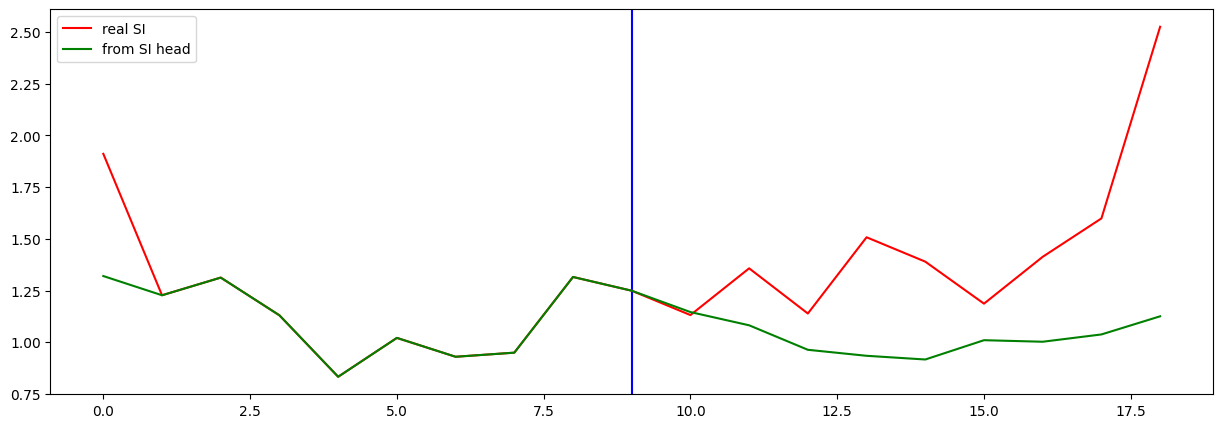

Testing R**2 - (all) - (no inputs):  0.7764453340451802
Testing R**2 - (f2) - SI full (no inputs):  -1.8240727985207918
Testing R**2 - SI head only (no inputs):  -1.706462546575175
0 ...index R**2 (no inputs):  -0.18006035715240598
1 ...index R**2 (no inputs):  -1.3403080266482363
2 ...index R**2 (no inputs):  -1.8240727985207918
3 ...index R**2 (no inputs):  0.021616626470374545
4 ...index R**2 (no inputs):  -0.39704075330913047
5 ...index R**2 (no inputs):  -0.4765059264971223
6 ...index R**2 (no inputs):  -0.7581865375584003
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.38516969620012875
10 ...index R**2 (no inputs):  -0.7197847372014847
11 ...index R**2 (no inputs):  -771.9947555809432
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.433893953664989
16 ...index R**2 (no inputs):  -0.12269995120498489
17 ...index R**2 (no inputs):  -2029.23

In [26]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk200to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)


res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 1.500760
Loss_SI: 1.6519973278045654 Loss_all: 0.13962550461292267
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.182063
Loss_SI: 0.18488678336143494 Loss_all: 0.156648188829422
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.126857
Loss_SI: 0.12778840959072113 Loss_all: 0.11847405135631561
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.061433
Loss_SI: 0.05438843369483948 Loss_all: 0.12483333051204681
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.036048
Loss_SI: 0.028523162007331848 Loss_all: 0.10377591848373413
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.031294
Loss_SI: 0.022941891103982925 Loss_all: 0.1064608097076416
Prediction shape: torch.Size([32, 35])
===


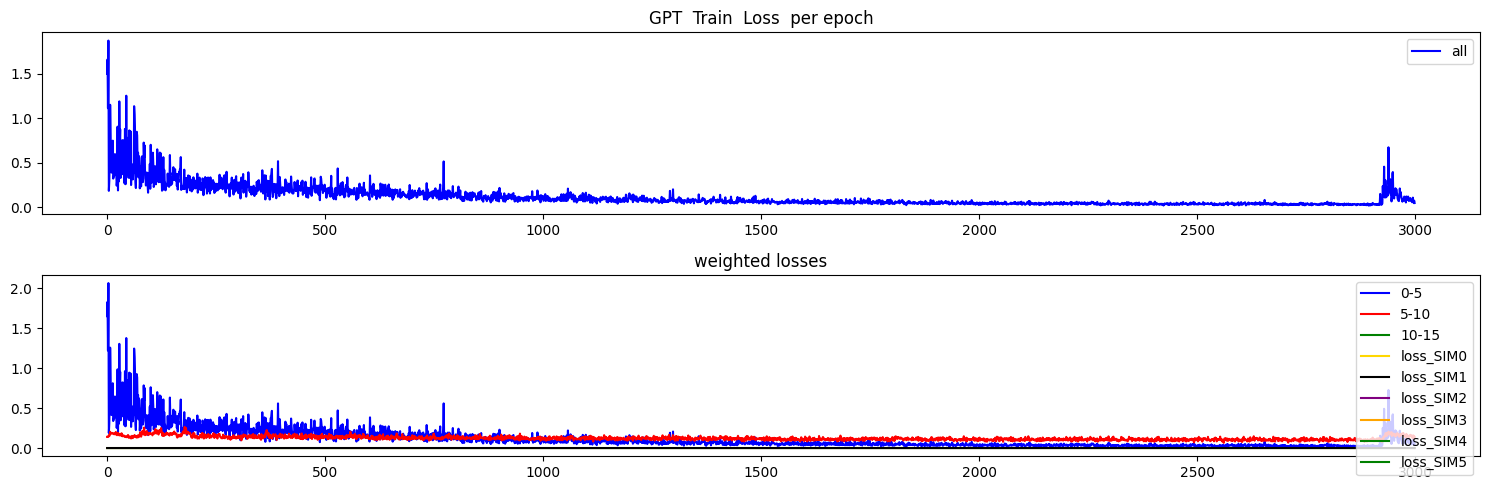

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


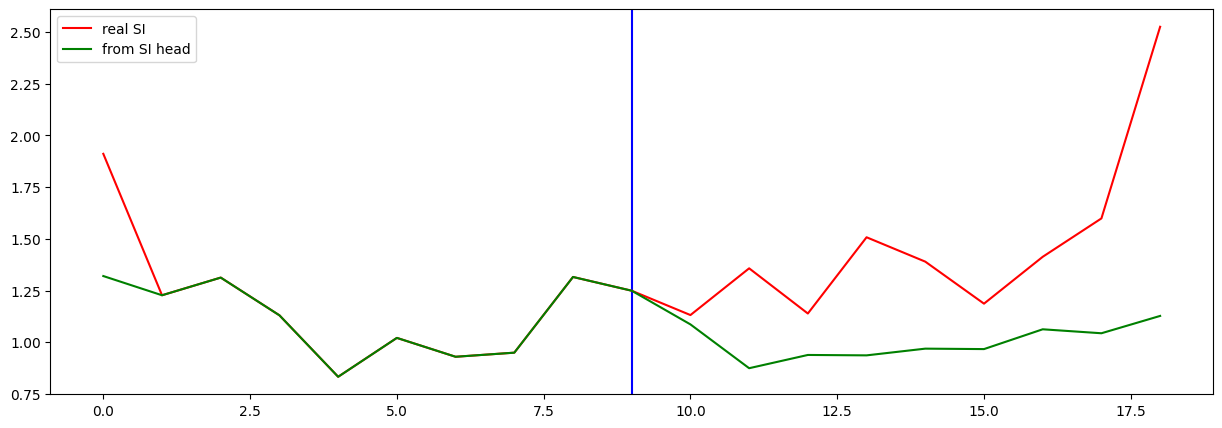

Testing R**2 - (all) - (no inputs):  0.7353186921222178
Testing R**2 - (f2) - SI full (no inputs):  -1.6091643714461026
Testing R**2 - SI head only (no inputs):  -1.7366312443905239
0 ...index R**2 (no inputs):  -0.056906998962034994
1 ...index R**2 (no inputs):  -2.233890135041848
2 ...index R**2 (no inputs):  -1.6091643714461026
3 ...index R**2 (no inputs):  -0.9638435041695634
4 ...index R**2 (no inputs):  -0.6871568559381271
5 ...index R**2 (no inputs):  -0.7468039179213652
6 ...index R**2 (no inputs):  -0.18650875770507835
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.39037638206841563
10 ...index R**2 (no inputs):  -0.13187655491607297
11 ...index R**2 (no inputs):  -461.79987774491127
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -4.9020978936940915
16 ...index R**2 (no inputs):  -1.635248209655788
17 ...index R**2 (no inputs):  -2686.3

In [27]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk100to400_train,  
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.713901
Loss_SI: 0.7785665988922119 Loss_all: 0.13190717995166779
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.335961
Loss_SI: 0.360120564699173 Loss_all: 0.11852693557739258
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.134039
Loss_SI: 0.13439786434173584 Loss_all: 0.13081161677837372
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.163384
Loss_SI: 0.1695186197757721 Loss_all: 0.10817130655050278
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.077787
Loss_SI: 0.07599718868732452 Loss_all: 0.09389721602201462
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.098758
Loss_SI: 0.09990059584379196 Loss_all: 0.08847284317016602
Prediction shape: torch.Size([32, 35])
===


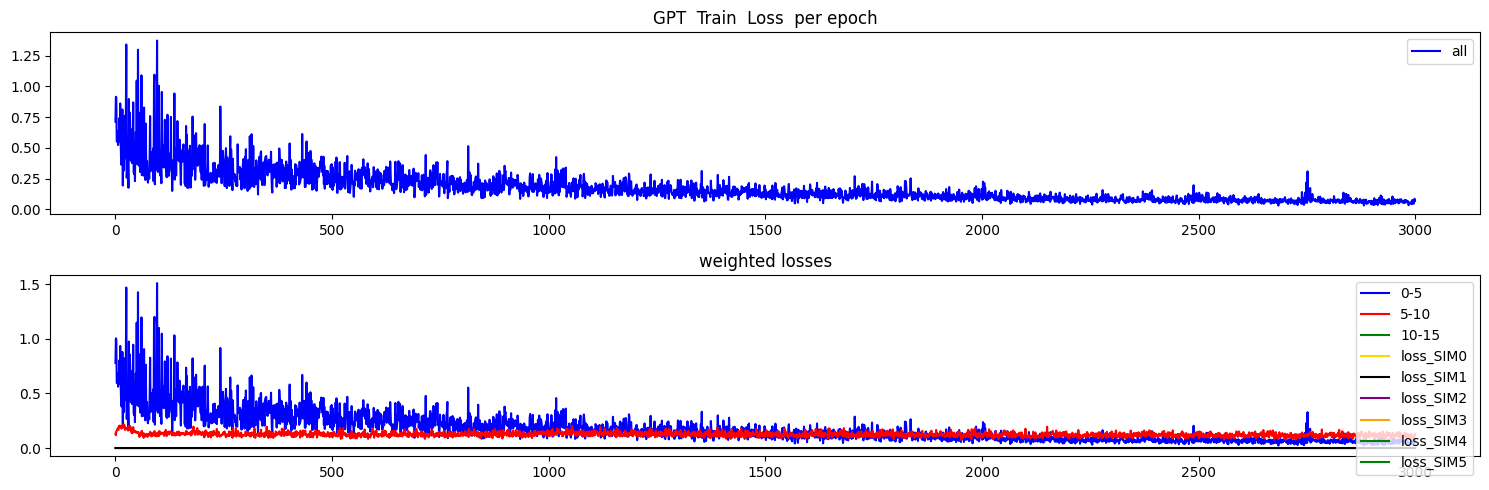

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


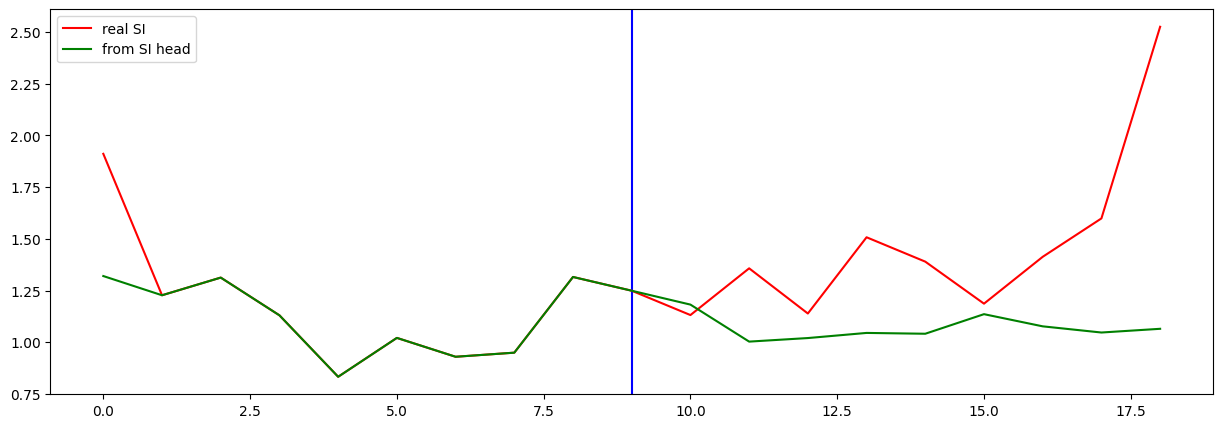

Testing R**2 - (all) - (no inputs):  0.7250607212940858
Testing R**2 - (f2) - SI full (no inputs):  -1.9072622326414939
Testing R**2 - SI head only (no inputs):  -1.5052445706094195
0 ...index R**2 (no inputs):  -0.008832541696722318
1 ...index R**2 (no inputs):  -1.177059733067301
2 ...index R**2 (no inputs):  -1.9072622326414939
3 ...index R**2 (no inputs):  -0.0670096588706588
4 ...index R**2 (no inputs):  -0.131666223182892
5 ...index R**2 (no inputs):  -0.8142987424698453
6 ...index R**2 (no inputs):  -0.2037878211669435
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.10891092550858383
10 ...index R**2 (no inputs):  -0.10809316284941795
11 ...index R**2 (no inputs):  -291.8759132158147
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.1914801369043504
16 ...index R**2 (no inputs):  -1.2002825854543118
17 ...index R**2 (no inputs):  -4400.249

In [28]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk000to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 2


In [29]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.894204
Loss_SI: 0.9801589250564575 Loss_all: 0.12061437964439392
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.042632
Loss_SI: 0.03214496746659279 Loss_all: 0.1370135098695755
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.050624
Loss_SI: 0.0451715886592865 Loss_all: 0.09969723224639893
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.020022
Loss_SI: 0.01193990372121334 Loss_all: 0.09275732934474945
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.016989
Loss_SI: 0.008282129652798176 Loss_all: 0.09534833580255508
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.017246
Loss_SI: 0.008501607924699783 Loss_all: 0.09594528377056122
Prediction shape: torch.Size([32, 35])
===


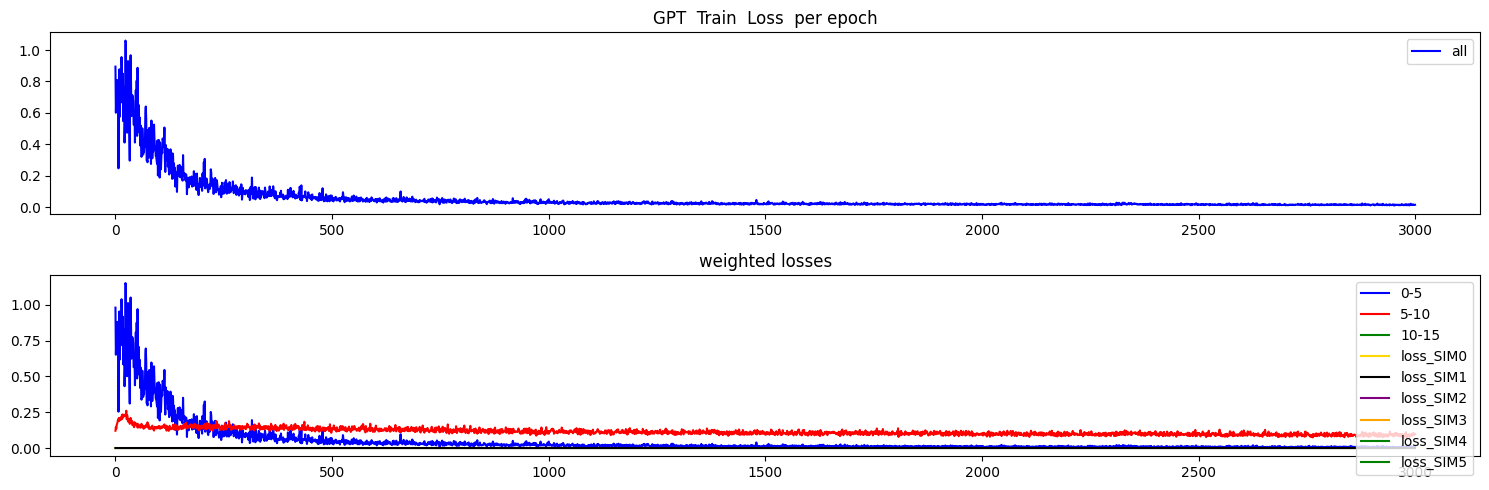

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


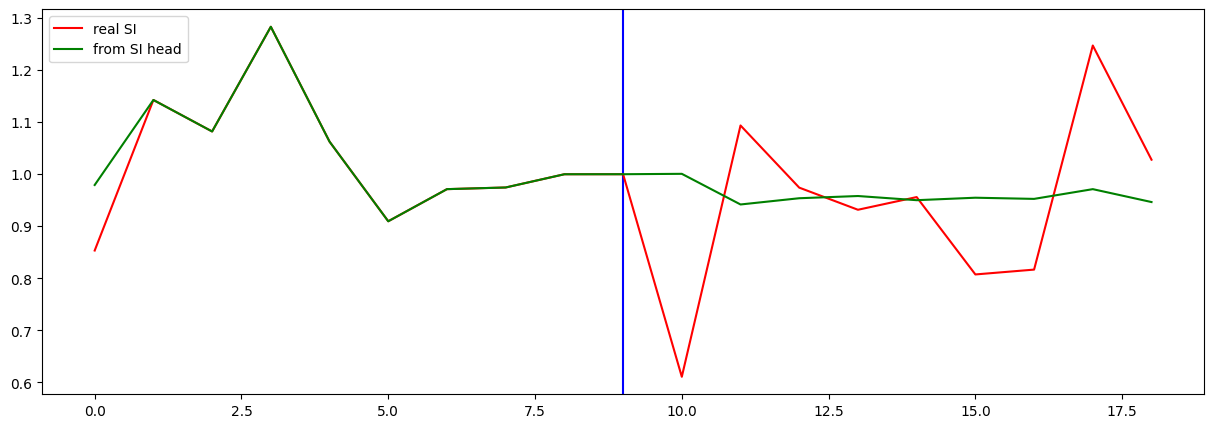

Testing R**2 - (all) - (no inputs):  0.9971202047592471
Testing R**2 - (f2) - SI full (no inputs):  0.0562584752506784
Testing R**2 - SI head only (no inputs):  0.07688576756583043
0 ...index R**2 (no inputs):  -0.049870529497724414
1 ...index R**2 (no inputs):  -0.31392272348797556
2 ...index R**2 (no inputs):  0.0562584752506784
3 ...index R**2 (no inputs):  -8.281041367008678
4 ...index R**2 (no inputs):  -0.457232696942508
5 ...index R**2 (no inputs):  -0.5002169484295051
6 ...index R**2 (no inputs):  -1446.9528095119695
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.1554694233465288
10 ...index R**2 (no inputs):  -0.17490799223939812
11 ...index R**2 (no inputs):  -116.99510793239243
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.319562809065451
16 ...index R**2 (no inputs):  -0.03298976619830385
17 ...index R**2 (no inputs):  -279.34515

In [30]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                         chunk300to400_train,
                         reasoning_steps=10,
                         backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


[0] Train Loss: 0.818405
Loss_SI: 0.8937689065933228 Loss_all: 0.1401347815990448
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.125029
Loss_SI: 0.1254880130290985 Loss_all: 0.12089904397726059
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.071778
Loss_SI: 0.06753070652484894 Loss_all: 0.11000270396471024
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.048292
Loss_SI: 0.037315674126148224 Loss_all: 0.14707988500595093
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.034003
Loss_SI: 0.02521054819226265 Loss_all: 0.11313851177692413
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.041741
Loss_SI: 0.03388860076665878 Loss_all: 0.11241645365953445
Prediction shape: torch.Size([32, 35])
===


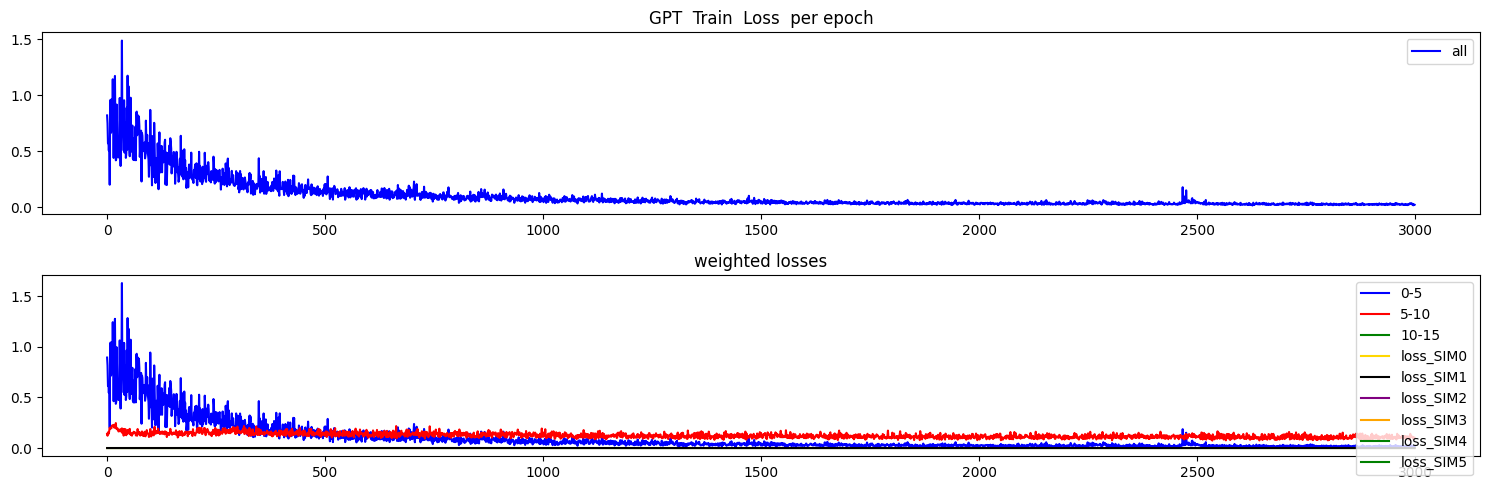

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


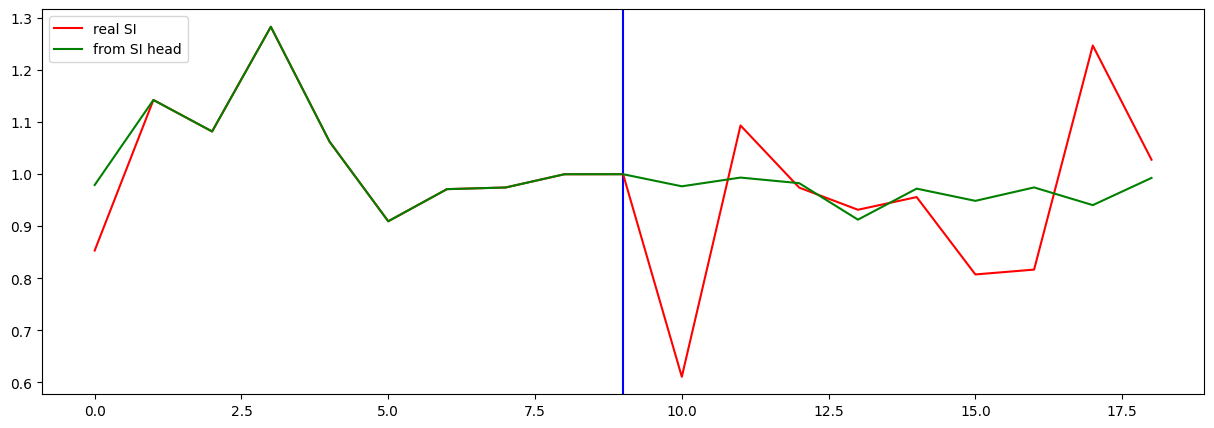

Testing R**2 - (all) - (no inputs):  0.9986687337989317
Testing R**2 - (f2) - SI full (no inputs):  -0.051157305812450815
Testing R**2 - SI head only (no inputs):  -0.02432465953563412
0 ...index R**2 (no inputs):  0.04130290453012986
1 ...index R**2 (no inputs):  -0.41300445360588434
2 ...index R**2 (no inputs):  -0.051157305812450815
3 ...index R**2 (no inputs):  -2.832160062103064
4 ...index R**2 (no inputs):  -20.916619819499516
5 ...index R**2 (no inputs):  0.36491153156328704
6 ...index R**2 (no inputs):  -2003.141981007901
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.17859688515624383
10 ...index R**2 (no inputs):  -0.09359651770851318
11 ...index R**2 (no inputs):  -224.75710074770666
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  0.0050327025745291465
16 ...index R**2 (no inputs):  -0.7335214325071038
17 ...index R**2 (no inputs):  -1

In [31]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk200to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


[0] Train Loss: 0.778139
Loss_SI: 0.8487218022346497 Loss_all: 0.14288896322250366
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.269339
Loss_SI: 0.284797728061676 Loss_all: 0.13021087646484375
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.117622
Loss_SI: 0.11513034254312515 Loss_all: 0.14005017280578613
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.075308
Loss_SI: 0.06746870279312134 Loss_all: 0.14586226642131805
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.035519
Loss_SI: 0.029021279886364937 Loss_all: 0.09399649500846863
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.037381
Loss_SI: 0.030213171616196632 Loss_all: 0.10189259797334671
Prediction shape: torch.Size([32, 35])
===


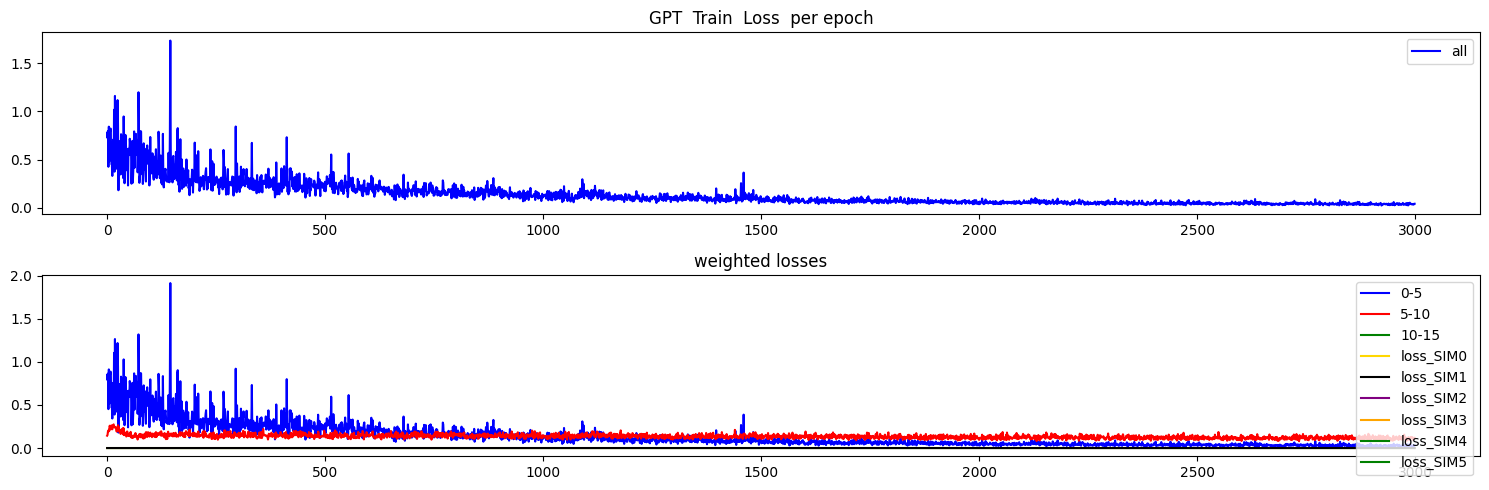

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


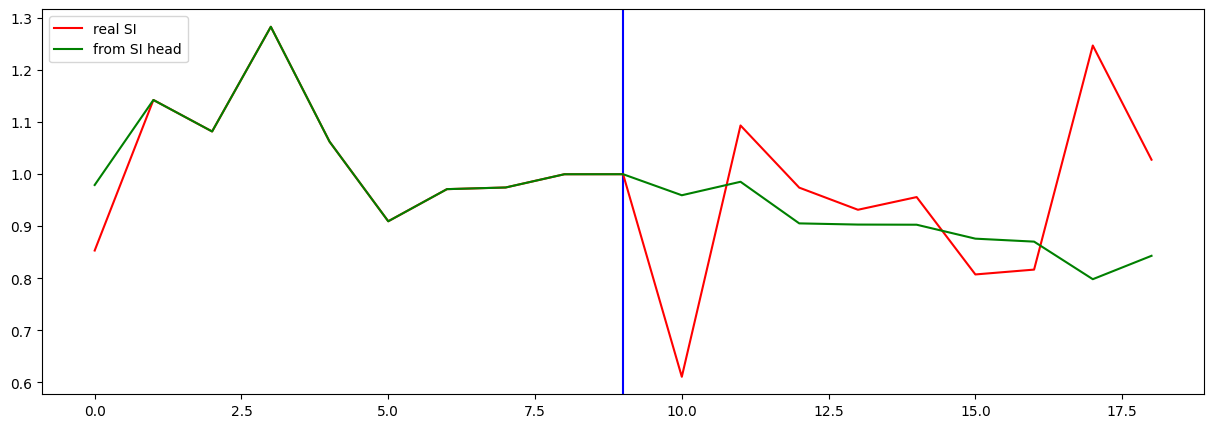

Testing R**2 - (all) - (no inputs):  0.9927733515377272
Testing R**2 - (f2) - SI full (no inputs):  -0.24060371633696853
Testing R**2 - SI head only (no inputs):  -0.4254059291510601
0 ...index R**2 (no inputs):  -0.0120840753175675
1 ...index R**2 (no inputs):  -0.9320578438266192
2 ...index R**2 (no inputs):  -0.24060371633696853
3 ...index R**2 (no inputs):  -28.287137818175513
4 ...index R**2 (no inputs):  -21.768566458474826
5 ...index R**2 (no inputs):  -2.640936367830296
6 ...index R**2 (no inputs):  -7022.582296244765
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -1.305096727205151
10 ...index R**2 (no inputs):  -0.42854549674615083
11 ...index R**2 (no inputs):  -98.83230894965506
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.4782039762615933
16 ...index R**2 (no inputs):  -0.15471909349200041
17 ...index R**2 (no inputs):  -2934.0298

In [32]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk100to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


[0] Train Loss: 0.333419
Loss_SI: 0.3573315441608429 Loss_all: 0.11820860952138901
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.244728
Loss_SI: 0.25742092728614807 Loss_all: 0.13049614429473877
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.100474
Loss_SI: 0.09391699731349945 Loss_all: 0.15949149429798126
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.224049
Loss_SI: 0.23585255444049835 Loss_all: 0.11782119423151016
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.063536
Loss_SI: 0.058087244629859924 Loss_all: 0.11257582157850266
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.056384
Loss_SI: 0.04947306588292122 Loss_all: 0.1185789704322815
Prediction shape: torch.Size([32, 35])
===


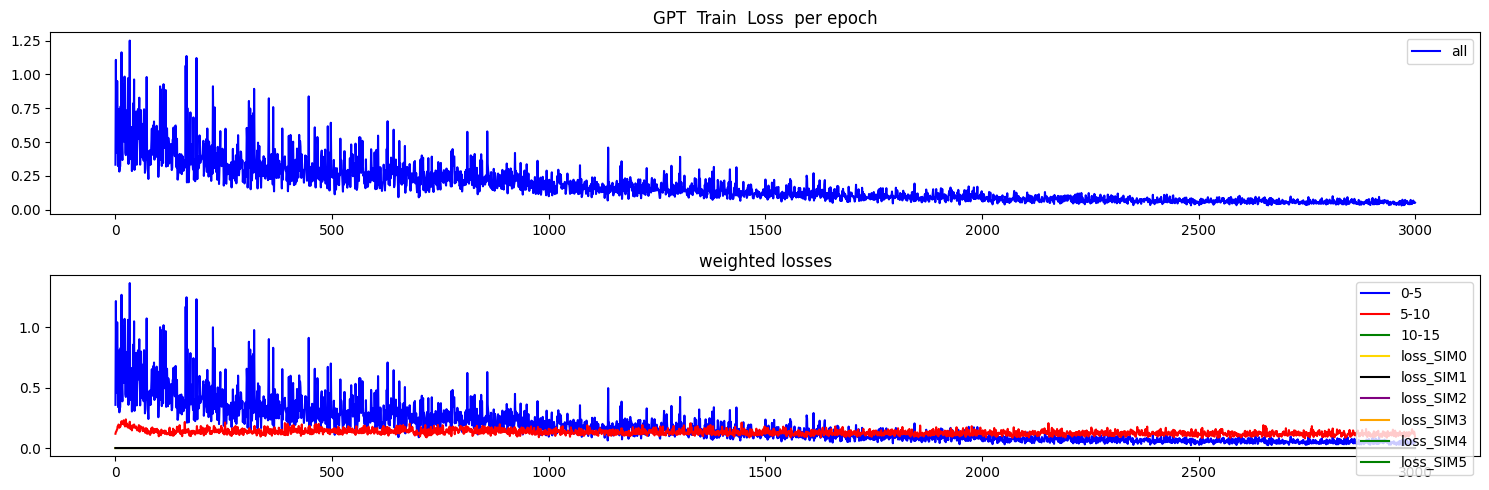

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


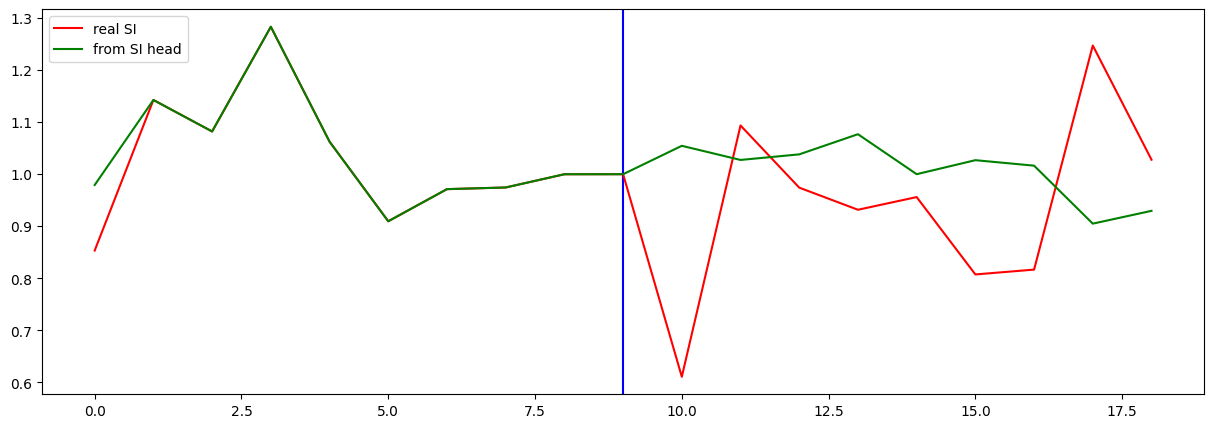

Testing R**2 - (all) - (no inputs):  0.9965626705509681
Testing R**2 - (f2) - SI full (no inputs):  -0.9721357077808532
Testing R**2 - SI head only (no inputs):  -0.15628659375641396
0 ...index R**2 (no inputs):  -0.2460027639176967
1 ...index R**2 (no inputs):  -0.7478867950107535
2 ...index R**2 (no inputs):  -0.9721357077808532
3 ...index R**2 (no inputs):  -10.711209346215902
4 ...index R**2 (no inputs):  -1.9521888457671714
5 ...index R**2 (no inputs):  -0.2665587971594072
6 ...index R**2 (no inputs):  -9739.32525172006
7 ...index R**2 (no inputs):  0.0
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  0.04047420643206201
10 ...index R**2 (no inputs):  -0.27669944321820816
11 ...index R**2 (no inputs):  -89.91850440782751
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -3.2307505434295694
16 ...index R**2 (no inputs):  -1.6130882221280767
17 ...index R**2 (no inputs):  -10575.1944

In [33]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                          chunk000to400_train,
                          reasoning_steps=10,
                          backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## Run 3


In [34]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.507127
Loss_SI: 0.5489762425422668 Loss_all: 0.1304878443479538
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.073843
Loss_SI: 0.0670885443687439 Loss_all: 0.1346321702003479
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.024863
Loss_SI: 0.013598751276731491 Loss_all: 0.12624409794807434
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.020483
Loss_SI: 0.008767887018620968 Loss_all: 0.12592269480228424
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.024249
Loss_SI: 0.015035644173622131 Loss_all: 0.10716760903596878
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.016369
Loss_SI: 0.007992889732122421 Loss_all: 0.09175057709217072
Prediction shape: torch.Size([32, 35])
===


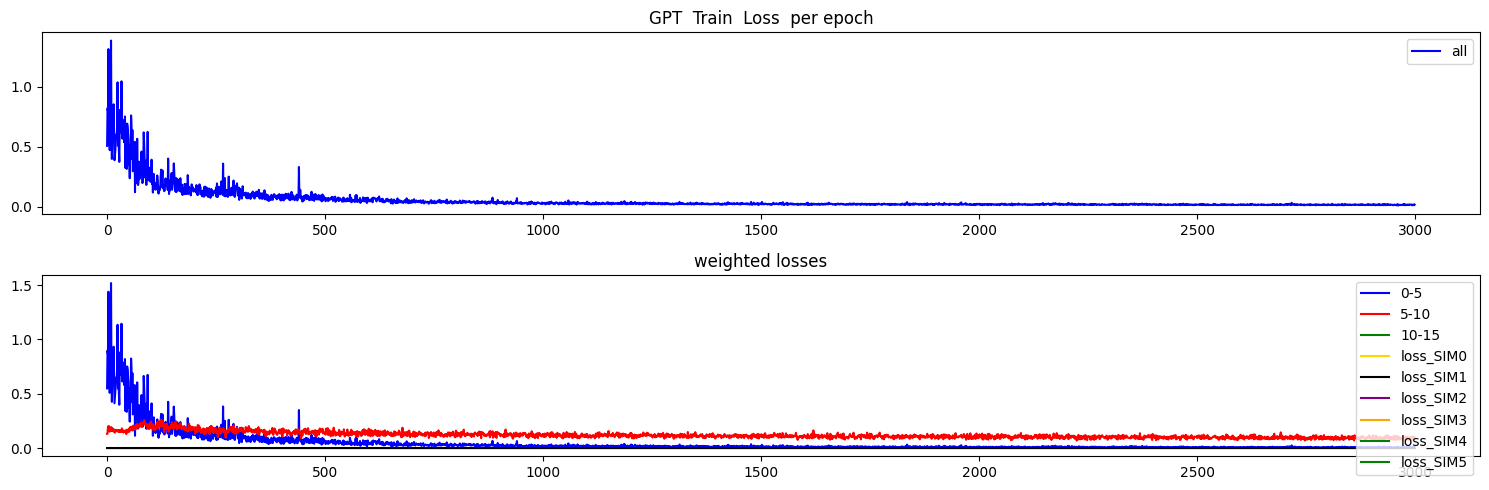

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


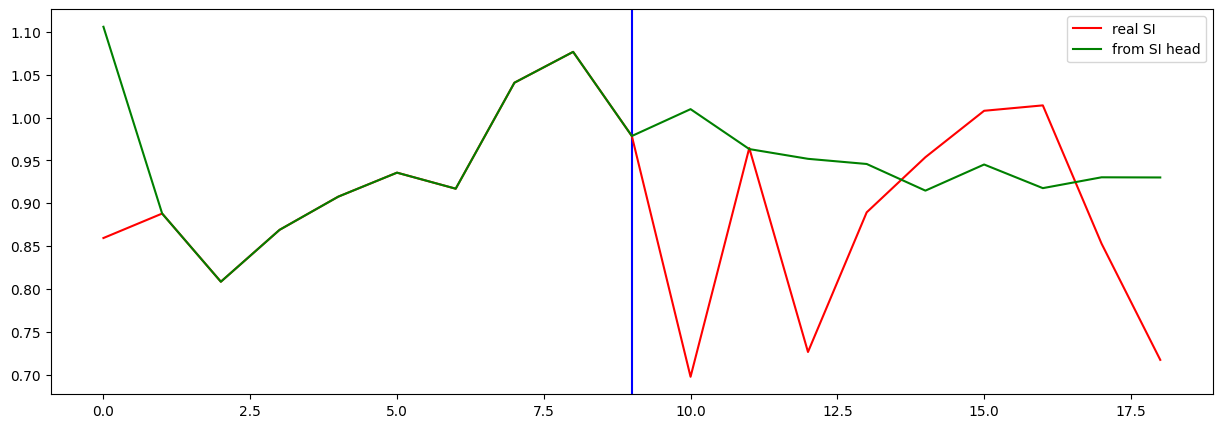

Testing R**2 - (all) - (no inputs):  0.991876324776552
Testing R**2 - (f2) - SI full (no inputs):  -0.19702289575717336
Testing R**2 - SI head only (no inputs):  -0.33042497824430406
0 ...index R**2 (no inputs):  -0.09077579860311724
1 ...index R**2 (no inputs):  0.12668327646176614
2 ...index R**2 (no inputs):  -0.19702289575717336
3 ...index R**2 (no inputs):  -0.870663124037167
4 ...index R**2 (no inputs):  -1.3941426556715202
5 ...index R**2 (no inputs):  0.0076763248773171755
6 ...index R**2 (no inputs):  -120.0798578344694
7 ...index R**2 (no inputs):  -7.612647413173232
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.1621169349627689
10 ...index R**2 (no inputs):  -0.15917213618963788
11 ...index R**2 (no inputs):  -124.22560194237523
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.8514590957002814
16 ...index R**2 (no inputs):  -0.15827368534520847
17 ...index R**2 (no 

In [35]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                           chunk300to400_train,
                           reasoning_steps=10,
                           backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.659328
Loss_SI: 0.7182096242904663 Loss_all: 0.12939698994159698
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.123616
Loss_SI: 0.1249837875366211 Loss_all: 0.11130686849355698
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.078236
Loss_SI: 0.07419664412736893 Loss_all: 0.11459287256002426
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.035302
Loss_SI: 0.025650160387158394 Loss_all: 0.12216929346323013
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.029876
Loss_SI: 0.022166624665260315 Loss_all: 0.09925826638936996
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.029681
Loss_SI: 0.021232763305306435 Loss_all: 0.10571644455194473
Prediction shape: torch.Size([32, 35])
===


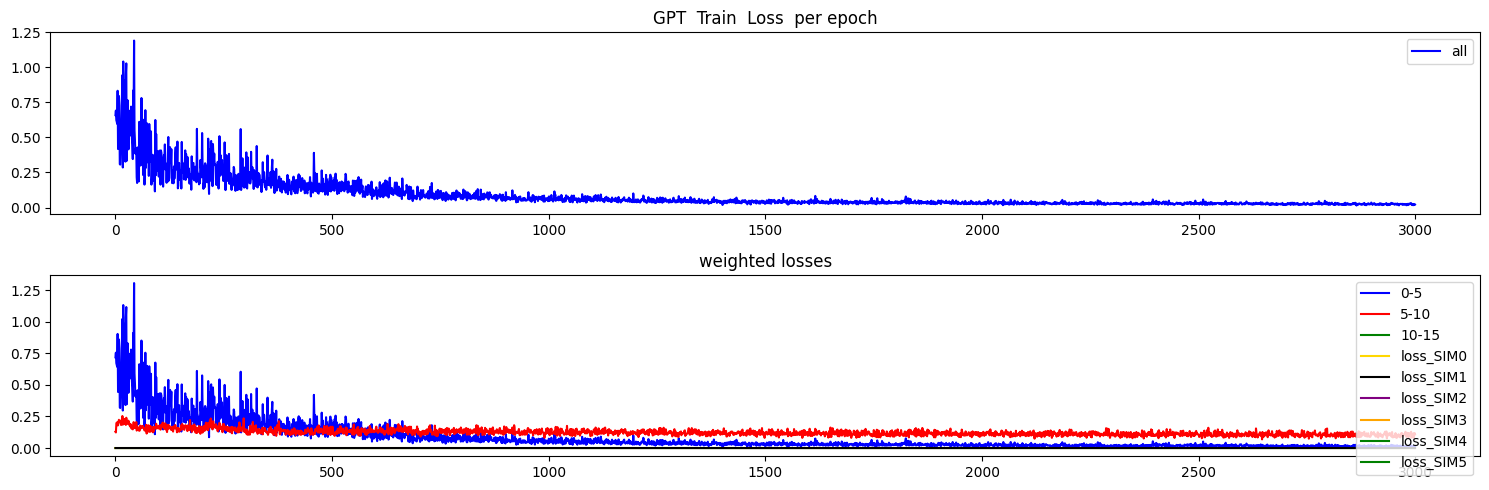

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


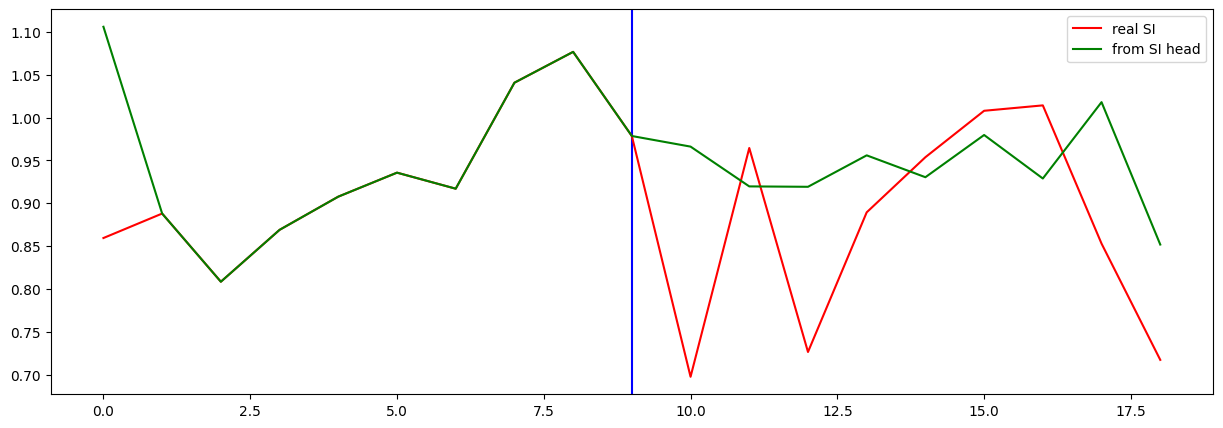

Testing R**2 - (all) - (no inputs):  0.9910031925224935
Testing R**2 - (f2) - SI full (no inputs):  -0.48193730243333355
Testing R**2 - SI head only (no inputs):  -0.449199952050102
0 ...index R**2 (no inputs):  -0.2789325605673112
1 ...index R**2 (no inputs):  -1.7984684286650463
2 ...index R**2 (no inputs):  -0.48193730243333355
3 ...index R**2 (no inputs):  -1.3768220655058334
4 ...index R**2 (no inputs):  -1.1665019811293122
5 ...index R**2 (no inputs):  -0.10329857775559192
6 ...index R**2 (no inputs):  -13.514843193538843
7 ...index R**2 (no inputs):  -0.9433586108924679
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.14108136643866587
10 ...index R**2 (no inputs):  -0.2219763919513873
11 ...index R**2 (no inputs):  -565.1465949051726
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -2.1065957441712646
16 ...index R**2 (no inputs):  -0.16481916303698307
17 ...index R**2 (no i

In [36]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk200to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

[0] Train Loss: 0.311812
Loss_SI: 0.33468031883239746 Loss_all: 0.10599899291992188
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.104071
Loss_SI: 0.09863965213298798 Loss_all: 0.15295125544071198
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.210404
Loss_SI: 0.21591001749038696 Loss_all: 0.16084842383861542
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.064296
Loss_SI: 0.056741923093795776 Loss_all: 0.13228096067905426
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.066195
Loss_SI: 0.062166180461645126 Loss_all: 0.10244979709386826
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.033427
Loss_SI: 0.02659168280661106 Loss_all: 0.09494810551404953
Prediction shape: torch.Size([32, 35])
===


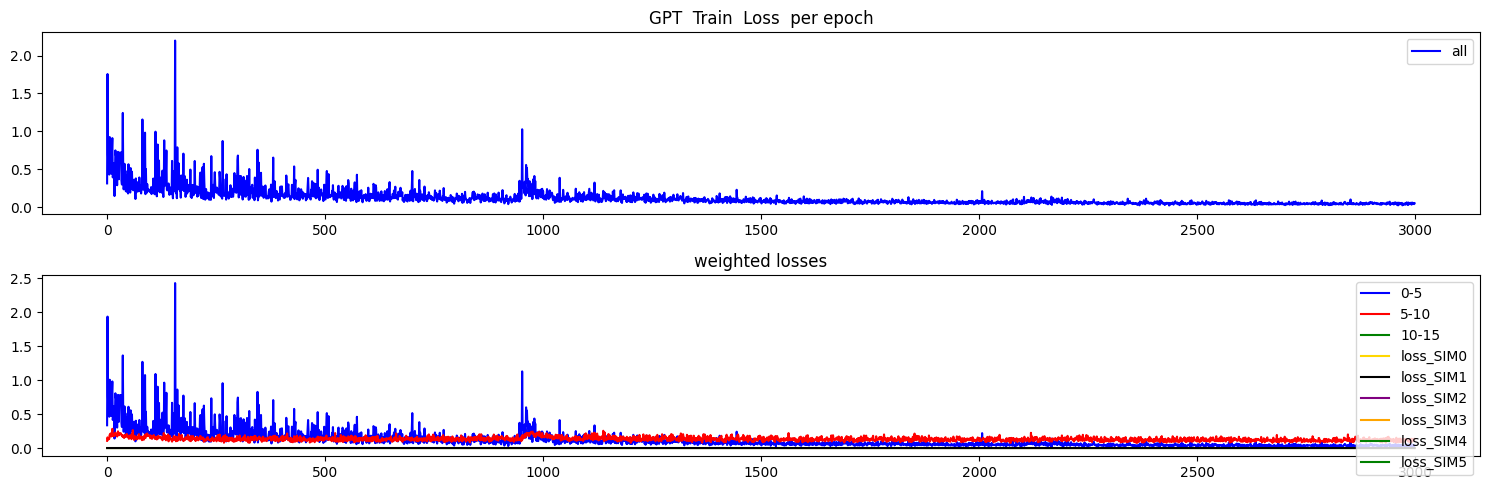

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


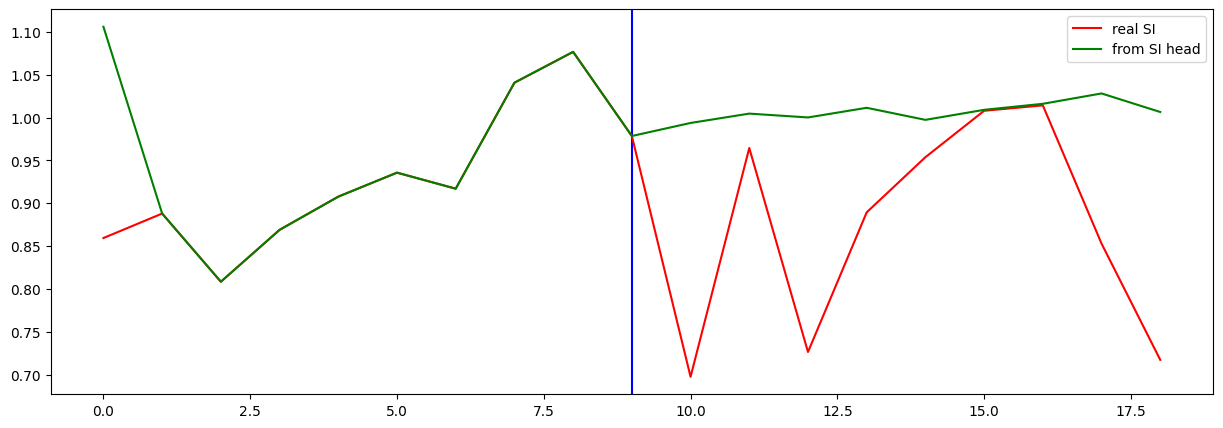

Testing R**2 - (all) - (no inputs):  0.9807200574101282
Testing R**2 - (f2) - SI full (no inputs):  -4.125280673297243
Testing R**2 - SI head only (no inputs):  -1.4425558323354943
0 ...index R**2 (no inputs):  -0.44665840698002546
1 ...index R**2 (no inputs):  -2.867692756472463
2 ...index R**2 (no inputs):  -4.125280673297243
3 ...index R**2 (no inputs):  -0.11720516509566425
4 ...index R**2 (no inputs):  -43.926624674372206
5 ...index R**2 (no inputs):  -1.3444904183658477
6 ...index R**2 (no inputs):  -976.198845567059
7 ...index R**2 (no inputs):  -0.5697359686256325
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.4747991167776986
10 ...index R**2 (no inputs):  -0.14756998742195293
11 ...index R**2 (no inputs):  -919.7757172853219
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -12.854554807685782
16 ...index R**2 (no inputs):  -0.046288853537595376
17 ...index R**2 (no input

In [37]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                            chunk100to400_train,
                            reasoning_steps=10,
                            backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.468452
Loss_SI: 0.5065290331840515 Loss_all: 0.12576116621494293
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.141525
Loss_SI: 0.142959862947464 Loss_all: 0.1286085695028305
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.150322
Loss_SI: 0.15438511967658997 Loss_all: 0.11375011503696442
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.087465
Loss_SI: 0.08418989181518555 Loss_all: 0.11693806946277618
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.071016
Loss_SI: 0.06606344133615494 Loss_all: 0.11558900773525238
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.066981
Loss_SI: 0.06192093342542648 Loss_all: 0.11252118647098541
Prediction shape: torch.Size([32, 35])
===


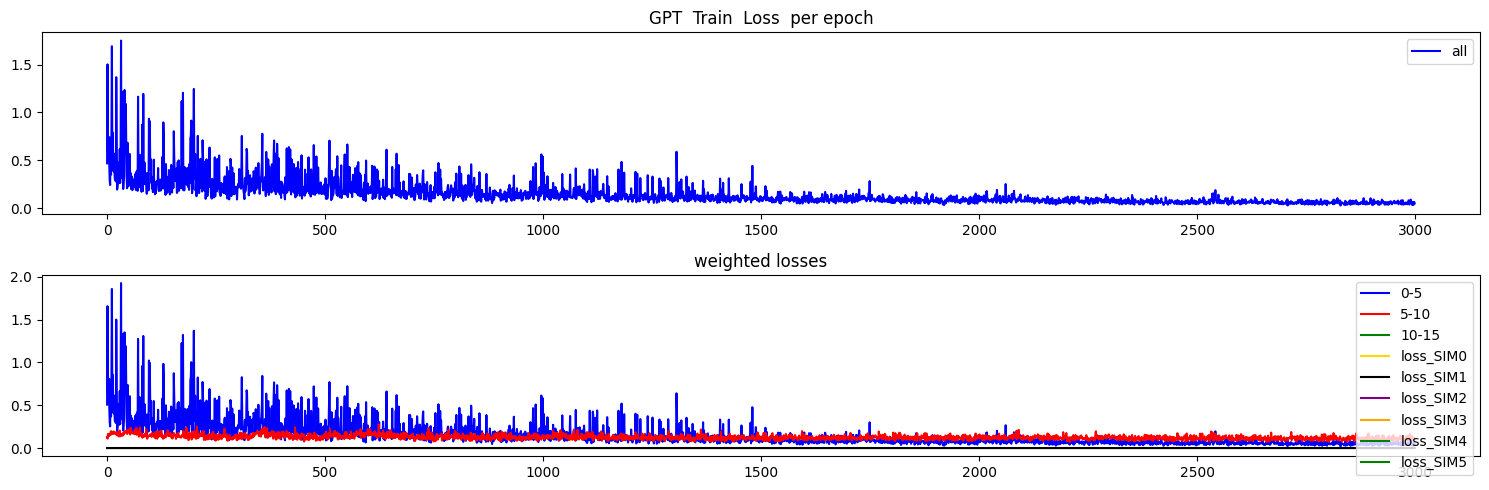

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


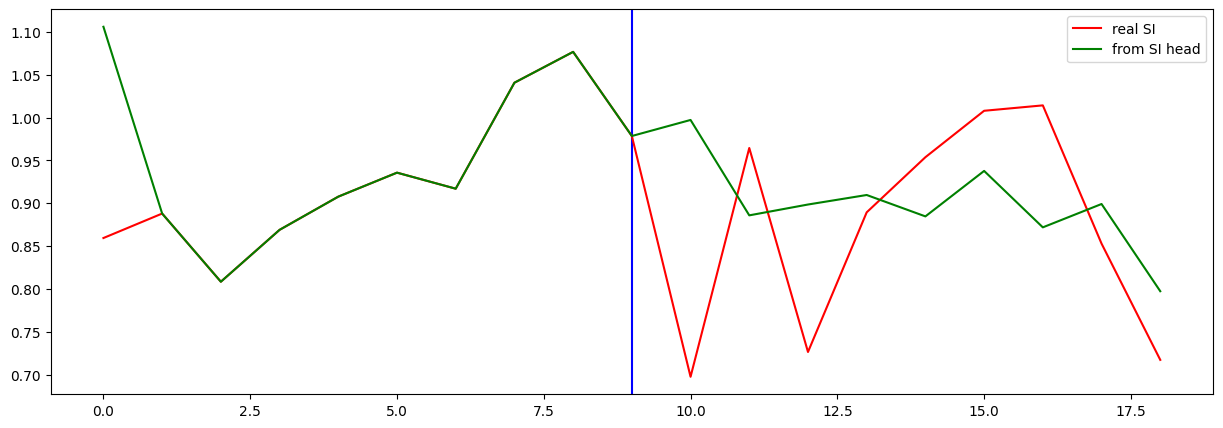

Testing R**2 - (all) - (no inputs):  0.980434311449492
Testing R**2 - (f2) - SI full (no inputs):  -0.7882802039865371
Testing R**2 - SI head only (no inputs):  0.11181112589205777
0 ...index R**2 (no inputs):  -0.4485647016095027
1 ...index R**2 (no inputs):  -0.43681689393440726
2 ...index R**2 (no inputs):  -0.7882802039865371
3 ...index R**2 (no inputs):  -1.3163610784201194
4 ...index R**2 (no inputs):  -2172.878001264812
5 ...index R**2 (no inputs):  -1.2565237759254617
6 ...index R**2 (no inputs):  -404.89276901198946
7 ...index R**2 (no inputs):  -19.33168780509015
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.18098980210822346
10 ...index R**2 (no inputs):  -0.20382539735607952
11 ...index R**2 (no inputs):  -2639.369523766513
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -35.68707259699629
16 ...index R**2 (no inputs):  -0.26639244713459576
17 ...index R**2 (no input

In [38]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk000to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 4


In [39]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


[0] Train Loss: 0.490263
Loss_SI: 0.5239341259002686 Loss_all: 0.18722215294837952
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.041078
Loss_SI: 0.030410464853048325 Loss_all: 0.13708779215812683
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.026863
Loss_SI: 0.01826140284538269 Loss_all: 0.10427266359329224
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.028579
Loss_SI: 0.01882888749241829 Loss_all: 0.11633346229791641
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.018432
Loss_SI: 0.00816915463656187 Loss_all: 0.11079345643520355
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.021370
Loss_SI: 0.01061510294675827 Loss_all: 0.11816277354955673
Prediction shape: torch.Size([32, 35])
===


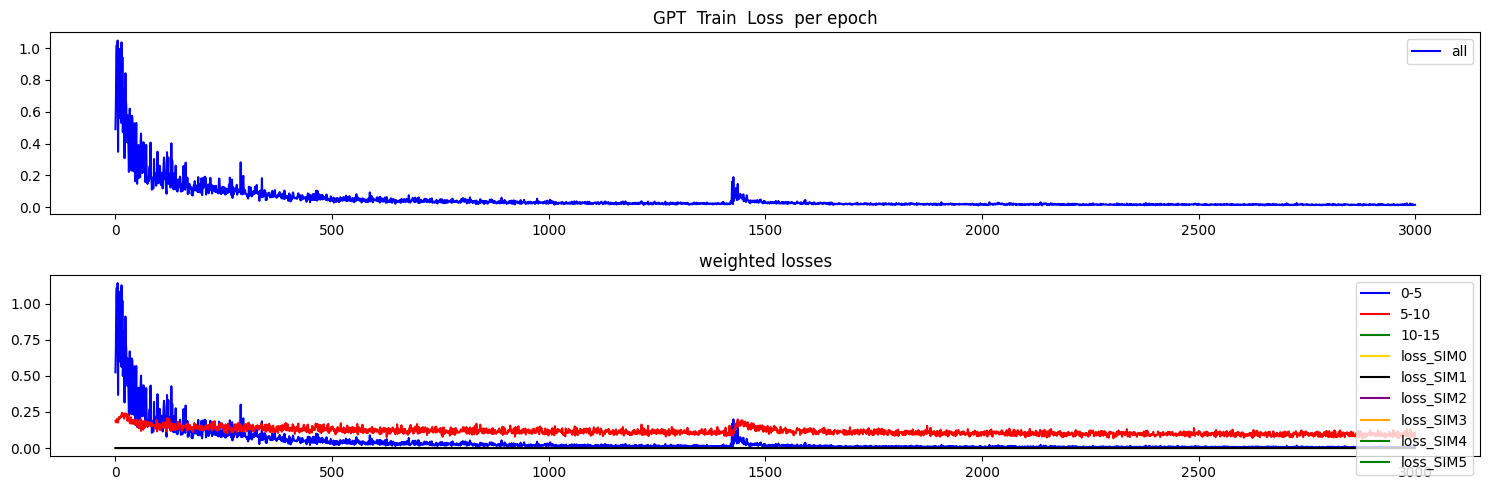

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


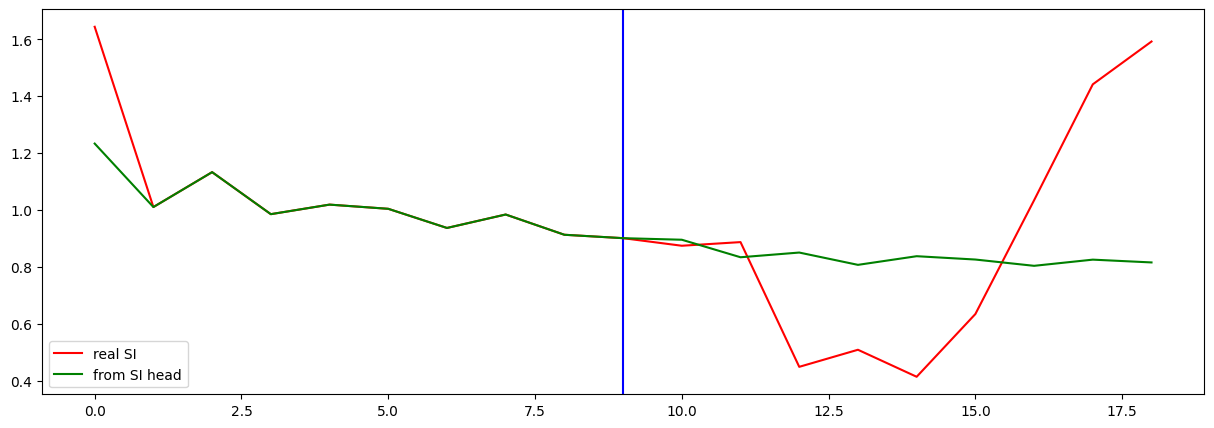

Testing R**2 - (all) - (no inputs):  0.8816188570854507
Testing R**2 - (f2) - SI full (no inputs):  -0.014410379867869194
Testing R**2 - SI head only (no inputs):  -0.10396752343814719
0 ...index R**2 (no inputs):  0.07313531959532205
1 ...index R**2 (no inputs):  -0.008347242194967741
2 ...index R**2 (no inputs):  -0.014410379867869194
3 ...index R**2 (no inputs):  -0.055650799093083236
4 ...index R**2 (no inputs):  0.0232184280949701
5 ...index R**2 (no inputs):  -0.4854672932426114
6 ...index R**2 (no inputs):  -17.607641740168376
7 ...index R**2 (no inputs):  0.31232809041876697
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.2834092160133088
10 ...index R**2 (no inputs):  -0.03974054876489319
11 ...index R**2 (no inputs):  -123.729568401263
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  1.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -0.5365584182902476
16 ...index R**2 (no inputs):  -0.23282040271412785
17 ...index R**2 

In [40]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk300to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )

[0] Train Loss: 0.752954
Loss_SI: 0.8217921257019043 Loss_all: 0.13340722024440765
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.126378
Loss_SI: 0.12348143756389618 Loss_all: 0.1524498015642166
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.103449
Loss_SI: 0.10133956372737885 Loss_all: 0.12243135273456573
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.050025
Loss_SI: 0.039593957364559174 Loss_all: 0.1439075618982315
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.034197
Loss_SI: 0.0254506878554821 Loss_all: 0.11291292309761047
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.039591
Loss_SI: 0.030408401042222977 Loss_all: 0.12223324179649353
Prediction shape: torch.Size([32, 35])
===


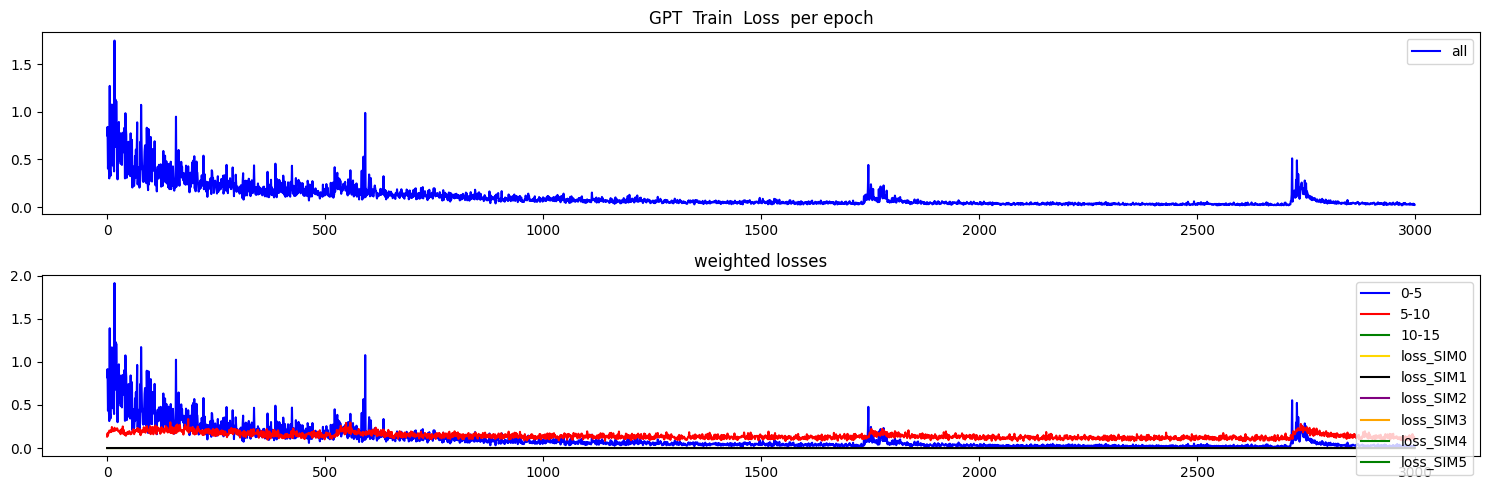

torch.Size([1, 19, 35])
torch.Size([1, 19, 35])
torch.Size([1, 35])
torch.Size([1, 19, 35])
(19, 35)
(19, 35)
(19,)
(19,)
(10,)
(9,)
(19,)
****
(19,)


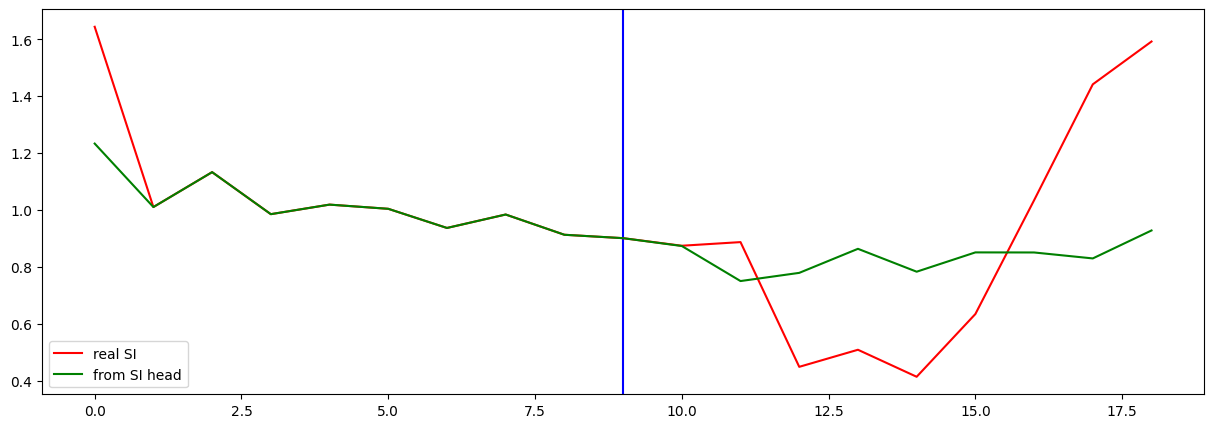

Testing R**2 - (all) - (no inputs):  0.8830890469841206
Testing R**2 - (f2) - SI full (no inputs):  -0.11260878877957126
Testing R**2 - SI head only (no inputs):  0.05779195428355555
0 ...index R**2 (no inputs):  0.0655946708878693
1 ...index R**2 (no inputs):  0.004363368289789005
2 ...index R**2 (no inputs):  -0.11260878877957126
3 ...index R**2 (no inputs):  -0.6438485797257325
4 ...index R**2 (no inputs):  -0.14758973599643976
5 ...index R**2 (no inputs):  -0.4661460842054588
6 ...index R**2 (no inputs):  -64.5305879936234
7 ...index R**2 (no inputs):  0.0437310514078364
8 ...index R**2 (no inputs):  0.0
9 ...index R**2 (no inputs):  -0.5541646128263171
10 ...index R**2 (no inputs):  -0.7564297434209588
11 ...index R**2 (no inputs):  -32.32495472532899
12 ...index R**2 (no inputs):  0.0
13 ...index R**2 (no inputs):  0.0
14 ...index R**2 (no inputs):  0.0
15 ...index R**2 (no inputs):  -1.1187647215080632
16 ...index R**2 (no inputs):  -0.0013987273550775114
17 ...index R**2 (no in

In [41]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                             chunk200to400_train,
                             reasoning_steps=10,
                             backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )

In [42]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                              chunk100to400_train,
                              reasoning_steps=10,
                              backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )

[0] Train Loss: 0.474350
Loss_SI: 0.5110896825790405 Loss_all: 0.14369739592075348
Prediction shape: torch.Size([32, 35])
===
[500] Train Loss: 0.268716
Loss_SI: 0.28567999601364136 Loss_all: 0.11604341864585876
Prediction shape: torch.Size([32, 35])
===
[1000] Train Loss: 0.265979
Loss_SI: 0.2798522412776947 Loss_all: 0.14111605286598206
Prediction shape: torch.Size([32, 35])
===
[1500] Train Loss: 0.088908
Loss_SI: 0.08534650504589081 Loss_all: 0.12096509337425232
Prediction shape: torch.Size([32, 35])
===
[2000] Train Loss: 0.042816
Loss_SI: 0.037200070917606354 Loss_all: 0.09335989505052567
Prediction shape: torch.Size([32, 35])
===
[2500] Train Loss: 0.037634
Loss_SI: 0.030421506613492966 Loss_all: 0.10255035012960434
Prediction shape: torch.Size([32, 35])
===


KeyboardInterrupt: 

In [ ]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk000to400_train, 
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )


## Run 5


In [ ]:

chunk300to400_train, chunk200to400_train, chunk100to400_train, chunk000to400_train, test_CIVS = tsGPT_obj.random_4_runs()


In [ ]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                               chunk300to400_train,
                               reasoning_steps=10,
                               backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk300to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_300to400.append( res_real )
all_pred_si_300to400.append( res_pred )


In [ ]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                chunk200to400_train, 
                                reasoning_steps=10,
                                backprop_through_steps=True 
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk200to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9  )

print( res_real )
print( res_pred )

all_real_si_200to400.append( res_real )
all_pred_si_200to400.append( res_pred )


In [ ]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk100to400_train, 
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)
res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk100to400_train, test_CIVS, si_GPT, x_means, x_standard_devs,  9 )

print( res_real )
print( res_pred )

all_real_si_100to400.append( res_real )
all_pred_si_100to400.append( res_pred )


In [ ]:

si_GPT, history_GPT, x_means, x_standard_devs, zz  = function_train_rc(  
                                 chunk000to400_train,
                                 reasoning_steps=10,
                                 backprop_through_steps=True
)

res_real, res_pred = inferenceGPT_obj.function_test_rc_42(  chunk000to400_train, test_CIVS, si_GPT, x_means, x_standard_devs, 9 )

print( res_real )
print( res_pred )

all_real_si_000to400.append( res_real )
all_pred_si_000to400.append( res_pred )



## R2 over accumulated Runs


In [ ]:

from sklearn.metrics import r2_score


real_si_concat_300to400 = np.concatenate(all_real_si_300to400)
pred_si_concat_300to400 = np.concatenate(all_pred_si_300to400)

real_si_concat_200to400 = np.concatenate(all_real_si_200to400)
pred_si_concat_200to400 = np.concatenate(all_pred_si_200to400)

real_si_concat_100to400 = np.concatenate(all_real_si_100to400)
pred_si_concat_100to400 = np.concatenate(all_pred_si_100to400)

real_si_concat_000to400 = np.concatenate(all_real_si_000to400)
pred_si_concat_000to400 = np.concatenate(all_pred_si_000to400)


In [ ]:


r2 = r2_score(real_si_concat_300to400, pred_si_concat_300to400 )

print("Accumulated R² 300to400:", r2)


In [ ]:

r2 = r2_score(real_si_concat_200to400, pred_si_concat_200to400 )

print("Accumulated R² 200to400:", r2)


In [ ]:

r2 = r2_score(real_si_concat_100to400, pred_si_concat_100to400 )

print("Accumulated R² 100to400:", r2)


In [ ]:

r2 = r2_score(real_si_concat_000to400, pred_si_concat_000to400 )

print("Accumulated R² 000to400:", r2)



## First Few R2


In [ ]:

from sklearn.metrics import r2_score
import numpy as np


def print_first_few_R2( real_si_concat, pred_si_concat, THE_FIRST_FEW ):

    first_n = THE_FIRST_FEW

    real = np.array( real_si_concat  )
    pred = np.array( pred_si_concat  )

    real_first4 = []
    pred_first4 = []

    for i in range(0, len(real), 9):
        real_first4.extend(real[i:i+first_n])
        pred_first4.extend(pred[i:i+first_n])

    # Convert to numpy arrays
    real_first4 = np.array(real_first4)
    pred_first4 = np.array(pred_first4)

    # Compute R²
    r2_first4 = r2_score(real_first4, pred_first4)
    print(THE_FIRST_FEW, ".....R² on first n steps:", r2_first4)


In [ ]:

print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 1 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 2 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 3 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 4 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 5 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 6 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 7 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 8 )
print_first_few_R2( real_si_concat_300to400, pred_si_concat_300to400, 9 )


In [ ]:

print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 1 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 2 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 3 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 4 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 5 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 6 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 7 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 8 )
print_first_few_R2( real_si_concat_200to400, pred_si_concat_200to400, 9 )


In [ ]:

print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 1 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 2 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 3 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 4 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 5 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 6 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 7 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 8 )
print_first_few_R2( real_si_concat_100to400, pred_si_concat_100to400, 9 )



In [ ]:

print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 1 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 2 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 3 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 4 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 5 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 6 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 7 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 8 )
print_first_few_R2( real_si_concat_000to400, pred_si_concat_000to400, 9 )



## Plot


In [ ]:

import matplotlib.pyplot as plt

def plot_r2_curves():
    steps = list(range(1, 10))

    r2_100 = [-0.121, 0.097, 0.116, 0.070, -0.005, -0.051, -0.114, -0.121, -0.058]
    r2_200 = [0.132, 0.245, 0.350, 0.341, 0.223, -0.028, -0.316, -0.505, -0.762]
    r2_300 = [0.304, -0.110, -0.173, -0.458, -0.662, -1.125, -1.568, -1.685, -1.631]
    r2_400 = [0.521, 0.202, 0.189, 0.187, 0.107, -0.064, -0.212, -0.217, -0.178]

    plt.plot(steps, r2_100, marker='o', label='100 Steps')
    plt.plot(steps, r2_200, marker='o', label='200 Steps')
    plt.plot(steps, r2_300, marker='o', label='300 Steps')
    plt.plot(steps, r2_400, marker='o', label='400 Steps')

    plt.title("R² Score vs. Prediction Horizon")
    plt.xlabel("Prediction Step (t+1 to t+9)")
    plt.ylabel("R² Score")
    plt.legend()
    plt.grid(True)
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()


plot_r2_curves()
    
